In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion_03 = np.genfromtxt('../dataset2/motion_03.csv', delimiter=',')
print("Motion 0.3 data has a length of ", len(motion_03))

Motion 0.3 data has a length of  116738


## Visualizations

In [6]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [7]:
"""
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]
"""

def get_specific_cmd(dataset, fwd, side, rot):
    idxs = []
    for row_id, item in enumerate(dataset):
        if np.isclose(item[2], fwd, 0.01) and np.isclose(item[3], side, 0.01) and np.isclose(item[4], rot, 0.01):
            idxs.append(row_id)
    
    return idxs

In [8]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_03

In [9]:
velocity = 0.313843

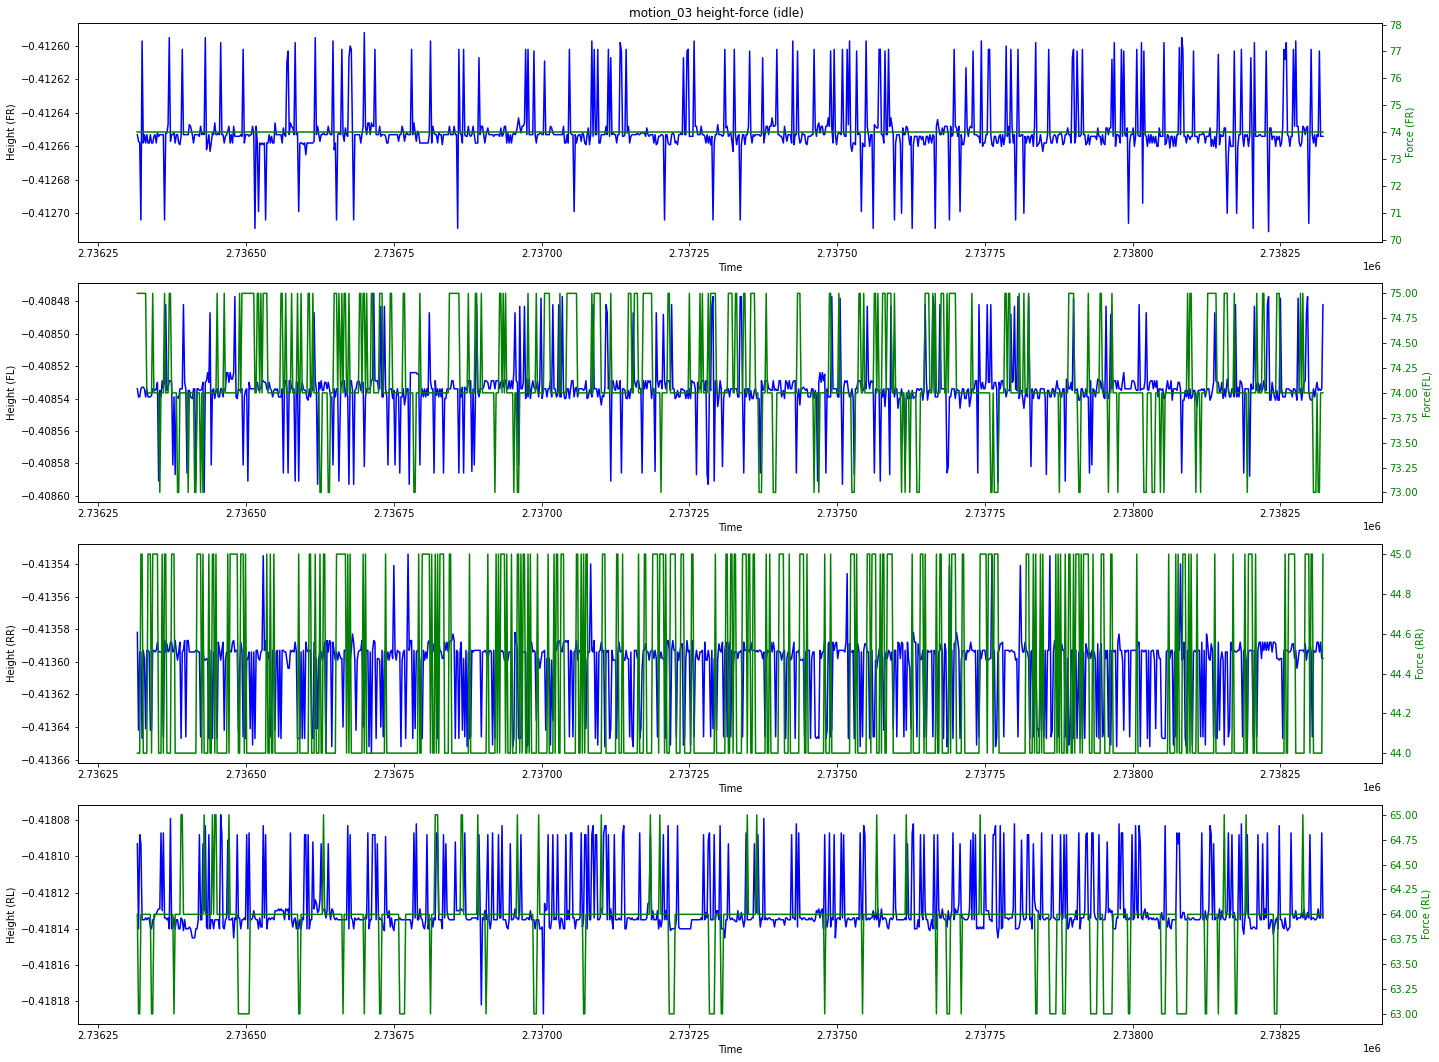

In [10]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_03)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_03 height-force (idle)",
                      motion_03,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

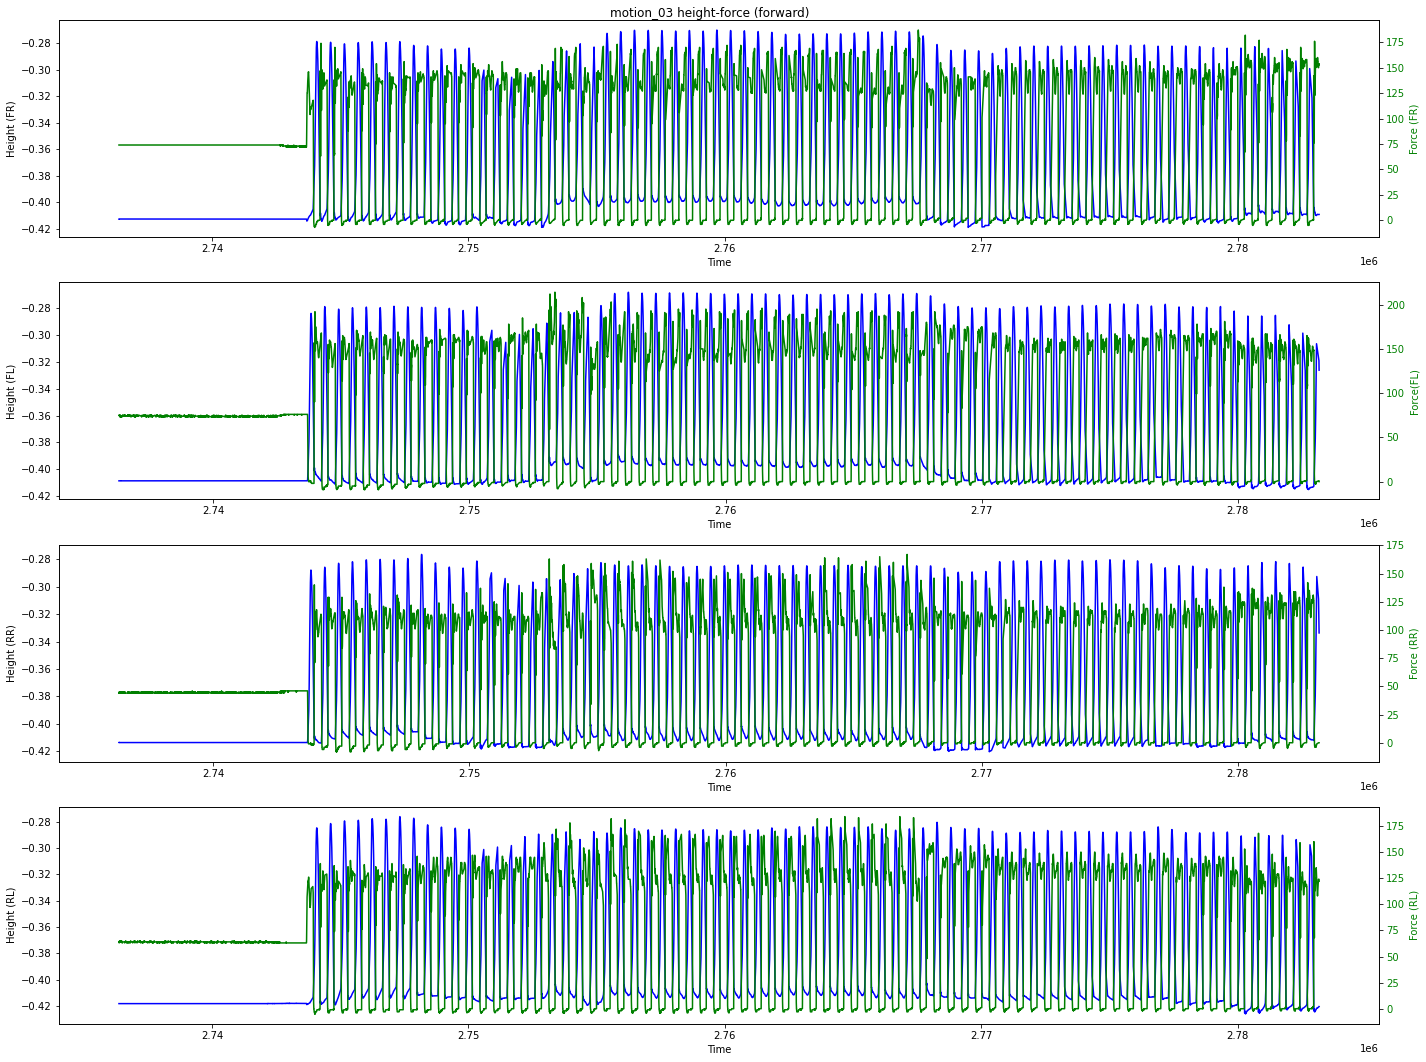

In [11]:
# Forward
fwd_cmds = get_specific_cmd(motion_03, velocity, 0, 0)
motion_03_fwd = motion_03[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_03_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_03 height-force (forward)",
                      motion_03,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

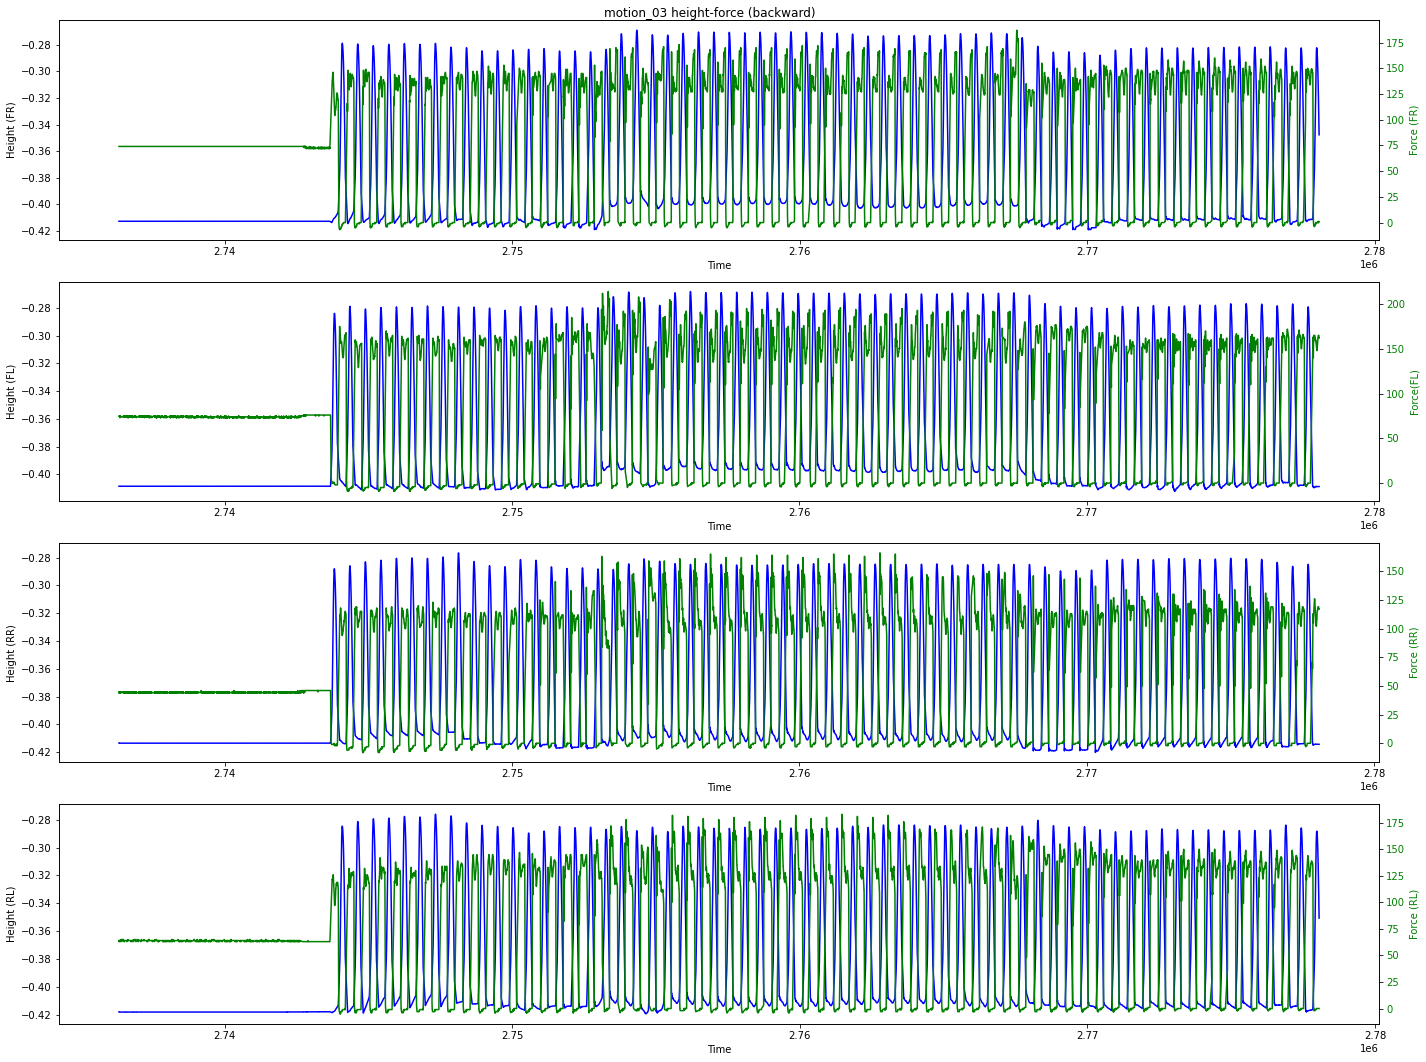

In [12]:
# Backwards
bwd_cmds = get_specific_cmd(motion_03, -velocity, 0, 0)
motion_03_bwd = motion_03[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_03_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_03 height-force (backward)",
                      motion_03,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

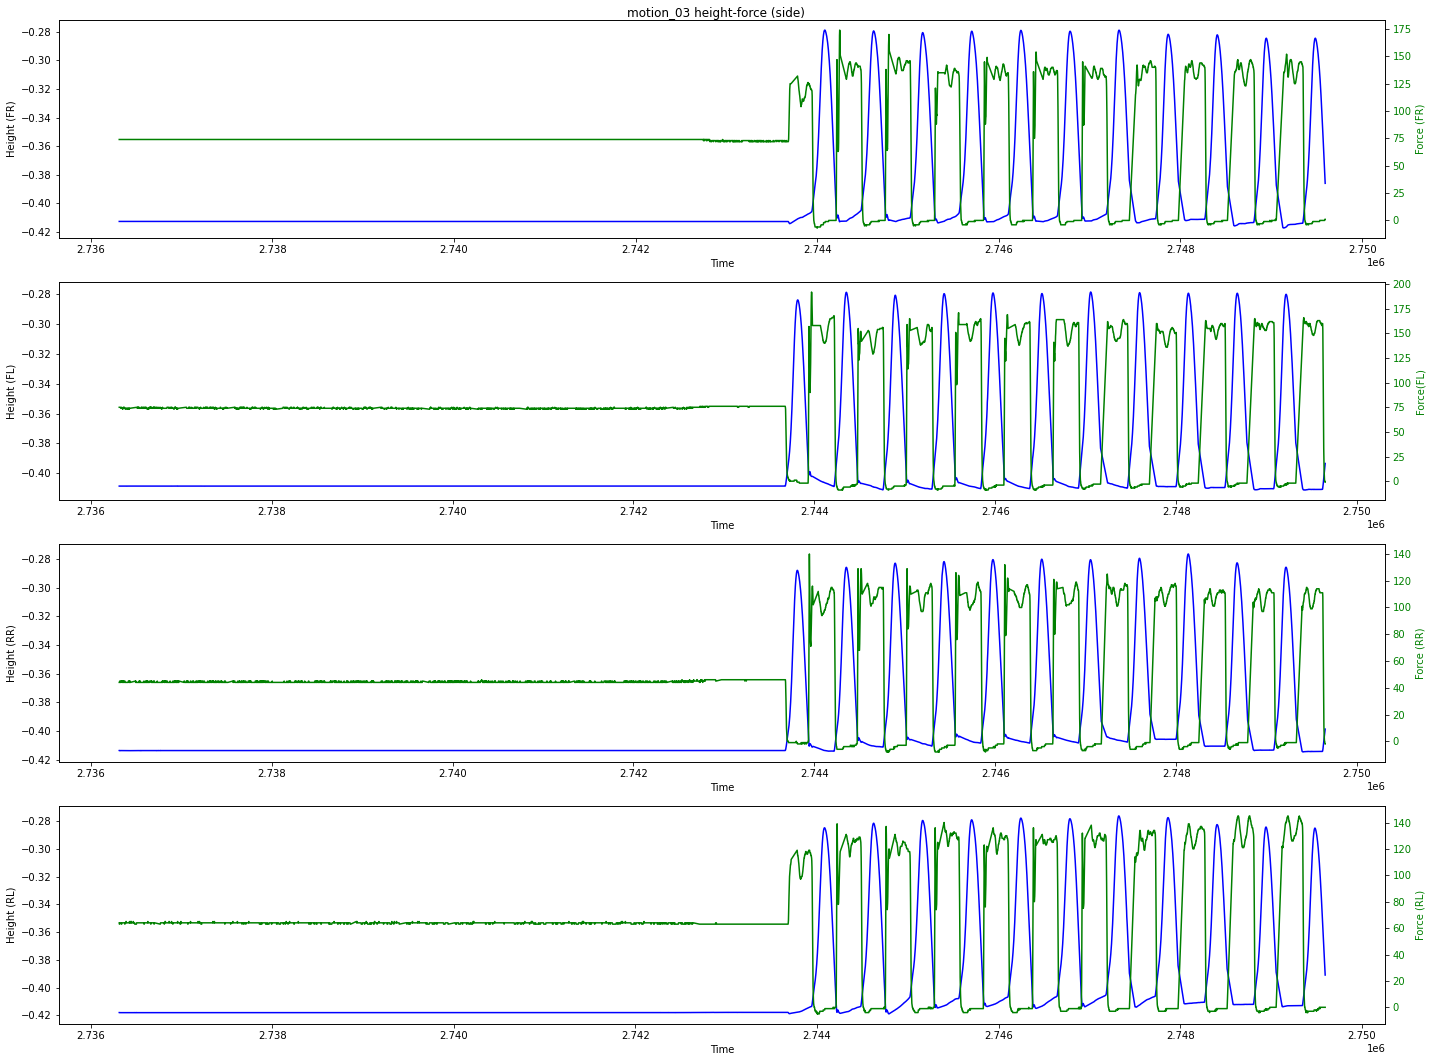

In [13]:
# Side (right)
side_cmds = get_specific_cmd(motion_03, 0, velocity, 0)
motion_03_side = motion_03[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_03_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_03 height-force (side)",
                      motion_03,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

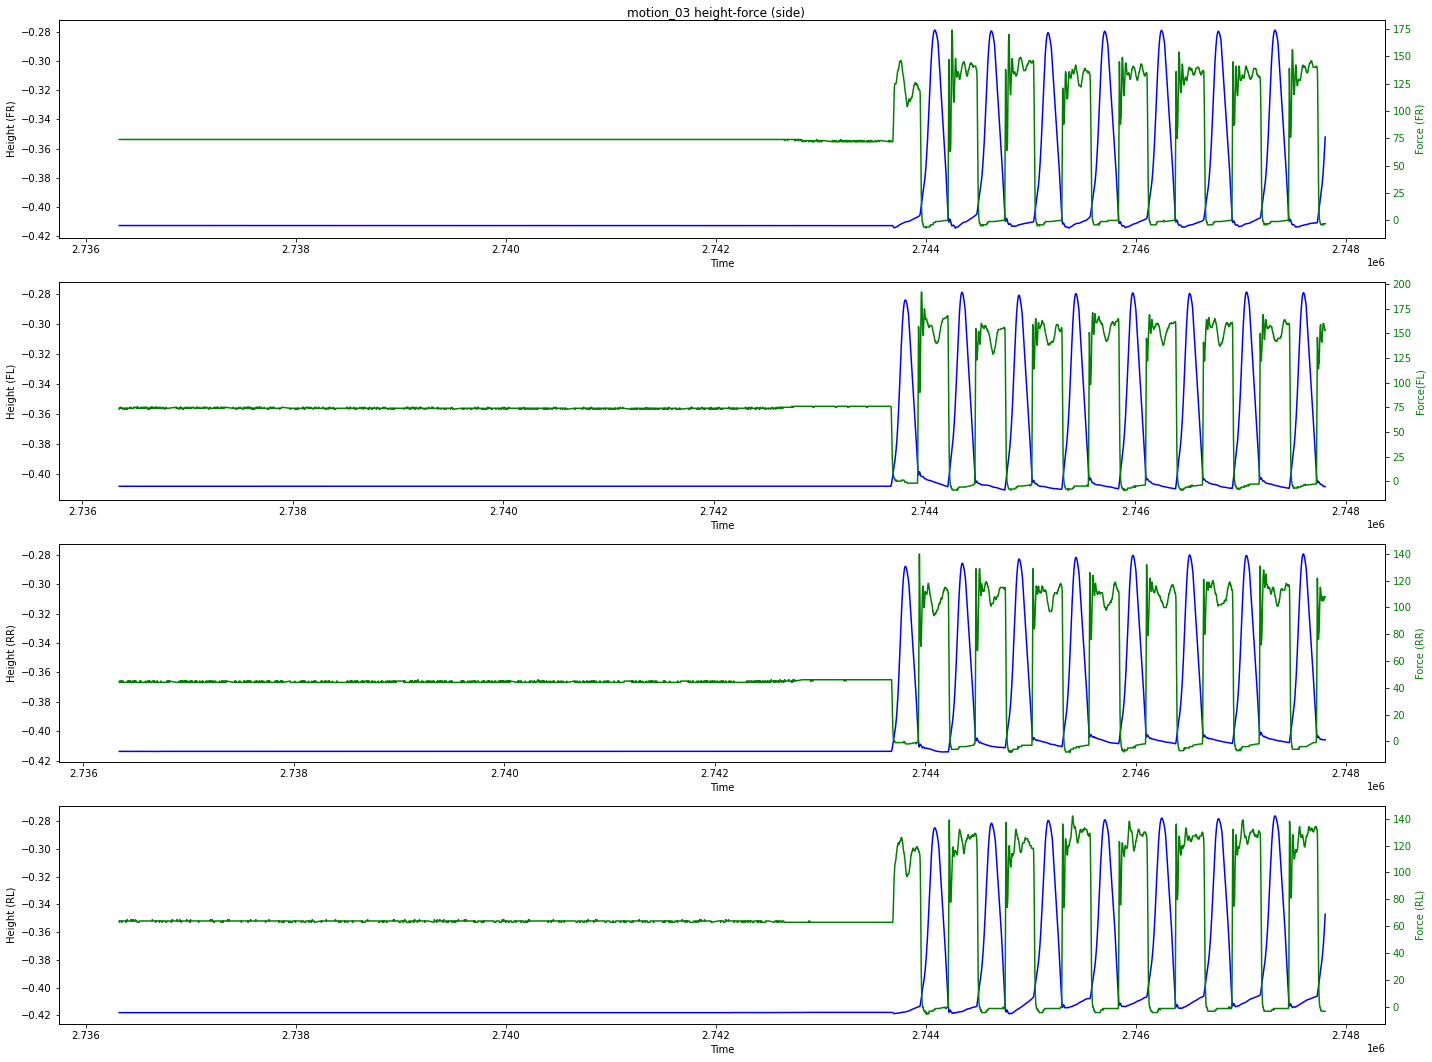

In [14]:
# Side (left)
side_cmds = get_specific_cmd(motion_03, 0, -velocity, 0)
motion_03_side = motion_03[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_03_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_03 height-force (side)",
                      motion_03,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

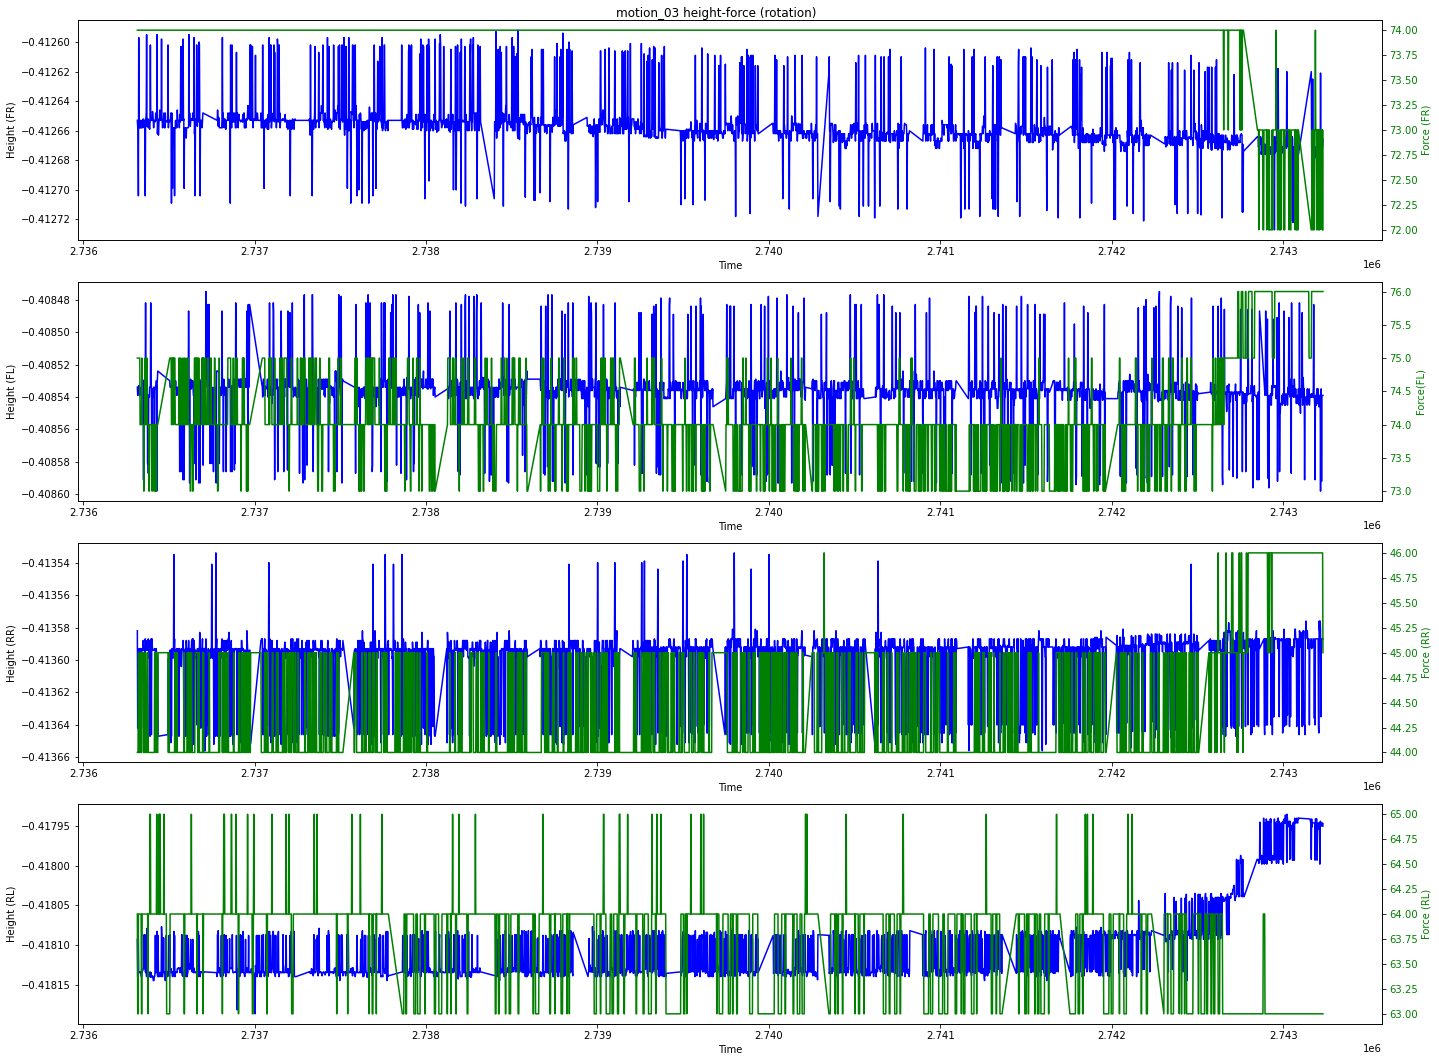

In [15]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_03, 0, 0, velocity)
motion_03_rot = motion_03[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_03_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_03 height-force (rotation)",
                      motion_03,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

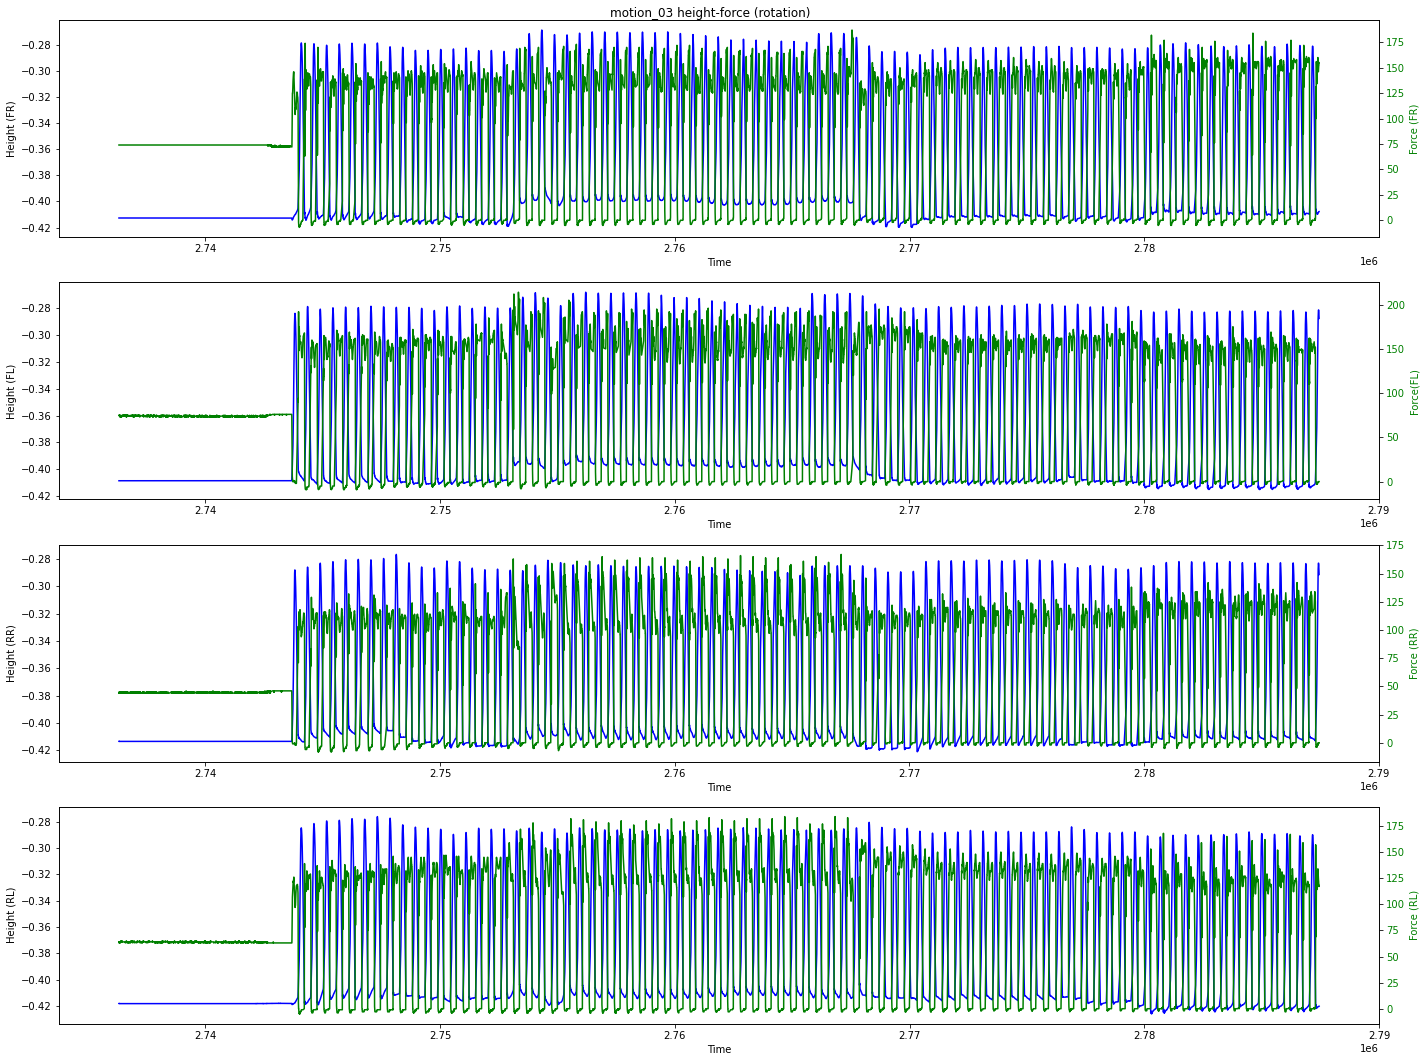

In [16]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_03, 0, 0, -velocity)
motion_03_rot = motion_03[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_03_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_03 height-force (rotation)",
                      motion_03,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [17]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

## Footsteps

In [18]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_03_cmds = motion_03[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_03_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_03_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_03_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_03_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [34, 56, 37, 57, 40, 58, 43, 59],
                           True,
                           motion_03_cmds[footsteps_nms(motion_03_cmds, footsteps), 0])
    
    return motion_03_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  19466 19449 20478 20582
Min and max diff between front and rear feet 4.6e-05 0.264566 

Amount of footsteps found with height criteria:  9574 

Intersection with motion commands:  9574 

Intersection with no motion commands:  0 

Number of force footsteps:  634 

Number of height-force footsteps:  634 

Number of footsteps extracted with height-force due to motion:  634 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  634
Footsteps after non-maximum-suppression:  172


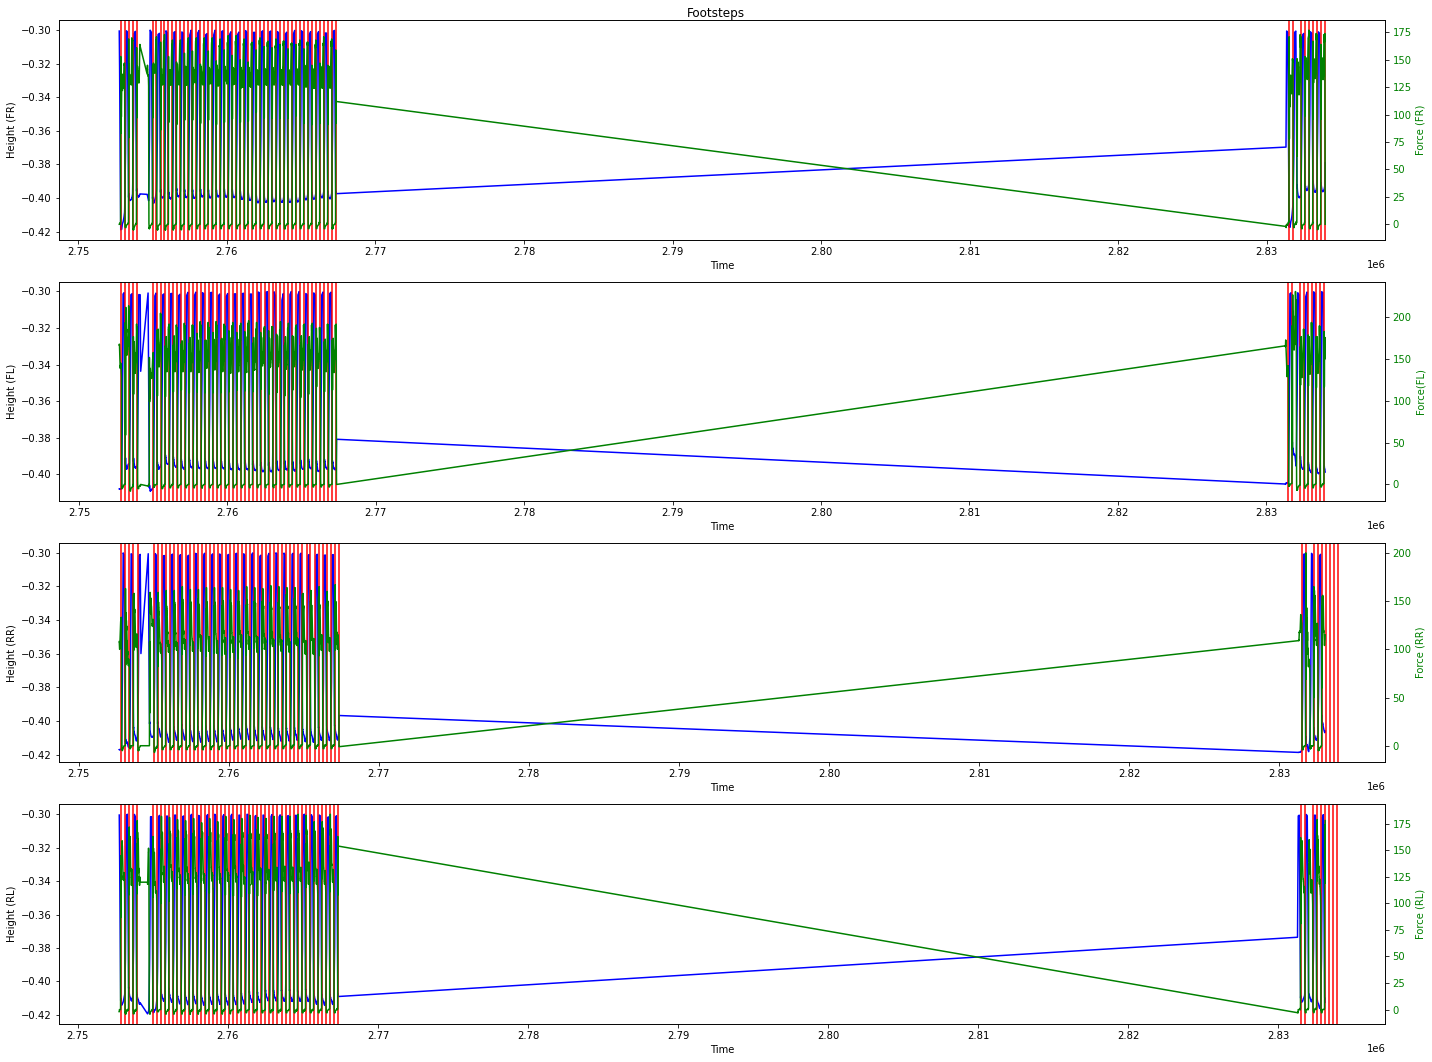

In [19]:
motion_03_fwd, footsteps_03_fwd = footstep_extraction_and_plotting(dataset=motion_03, velocities=[velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 7000))

### Backward motion

Foot swinging motions lenghts:  18398 18011 18307 18169
Min and max diff between front and rear feet 0.001143 0.27058 

Amount of footsteps found with height criteria:  8363 

Intersection with motion commands:  8363 

Intersection with no motion commands:  0 

Number of force footsteps:  569 

Number of height-force footsteps:  569 

Number of footsteps extracted with height-force due to motion:  569 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  569
Footsteps after non-maximum-suppression:  155


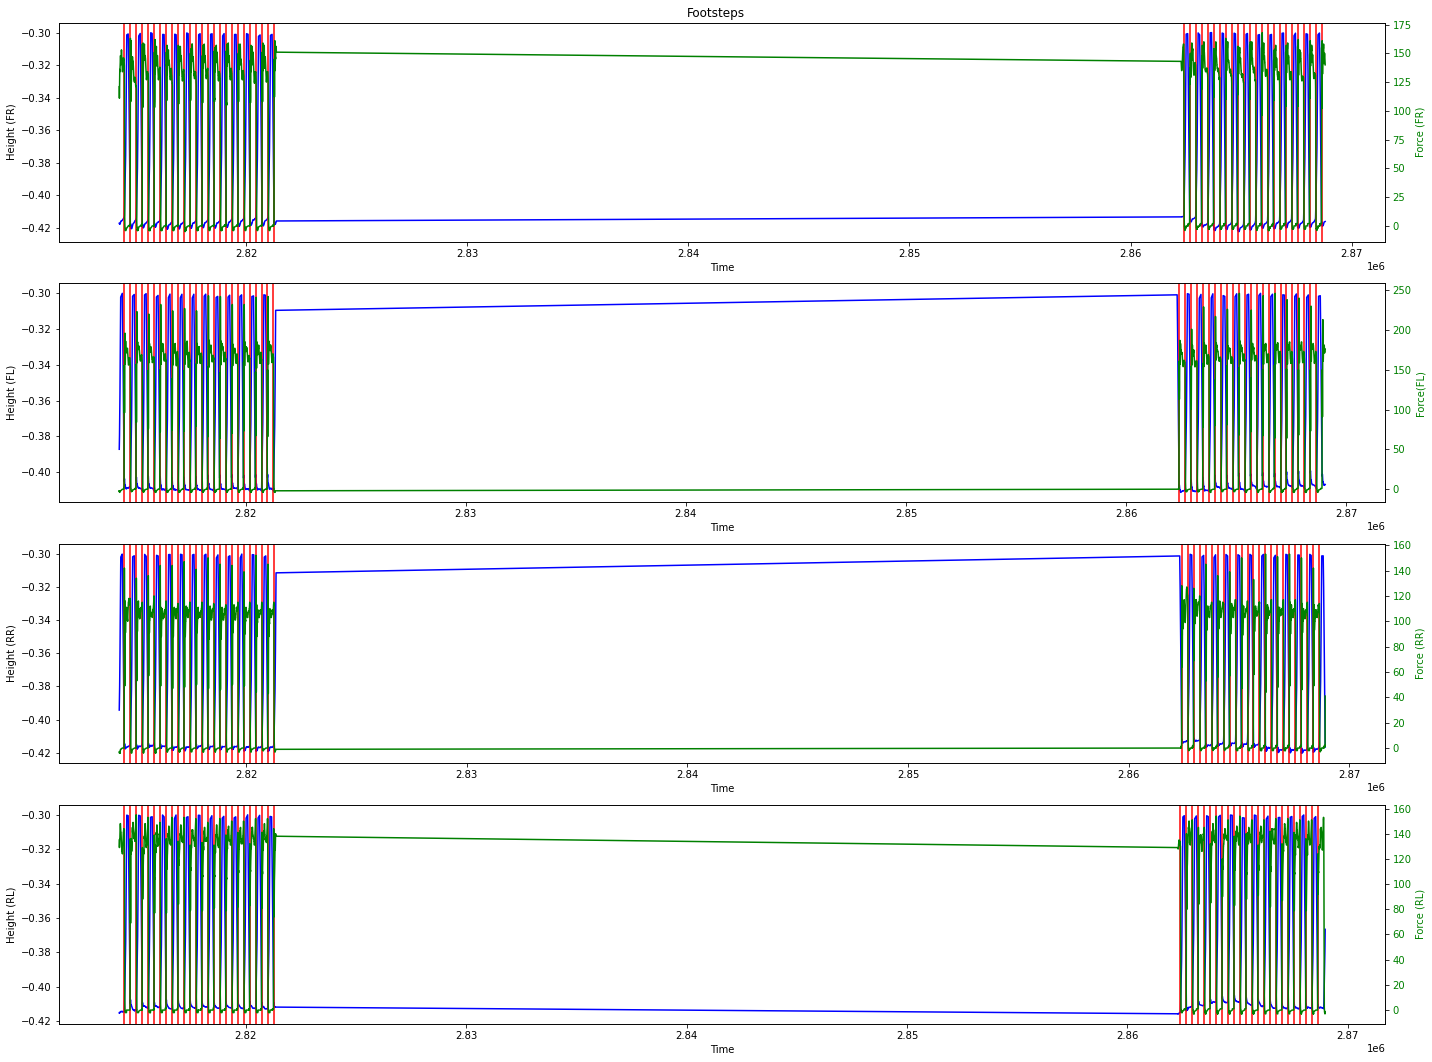

In [20]:
motion_03_bwd, footsteps_03_bwd = footstep_extraction_and_plotting(dataset=motion_03, velocities=[-velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Side motion (right)

Foot swinging motions lenghts:  5789 5688 5956 5875
Min and max diff between front and rear feet 0.001755 0.264242 

Amount of footsteps found with height criteria:  2692 

Intersection with motion commands:  2692 

Intersection with no motion commands:  0 

Number of force footsteps:  178 

Number of height-force footsteps:  178 

Number of footsteps extracted with height-force due to motion:  178 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  178
Footsteps after non-maximum-suppression:  49


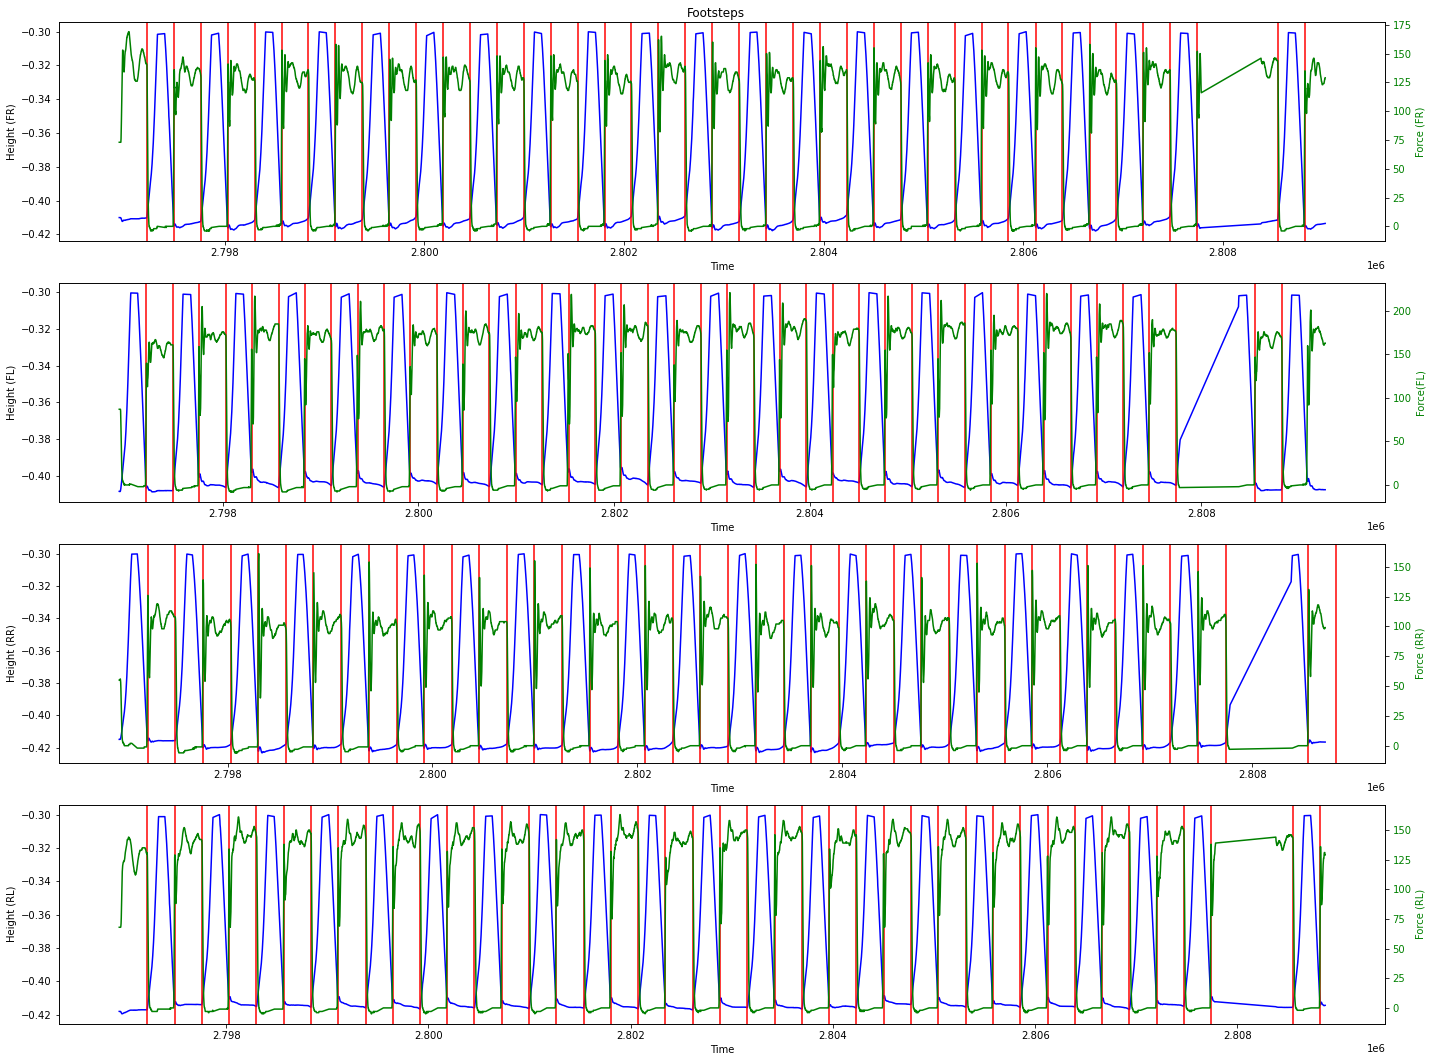

In [21]:
motion_03_side_right, footsteps_03_side_right = footstep_extraction_and_plotting(dataset=motion_03, velocities=[0, velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 5000))

### Side (left)

Foot swinging motions lenghts:  4975 4966 5031 5155
Min and max diff between front and rear feet 0.001713 0.265689 

Amount of footsteps found with height criteria:  2322 

Intersection with motion commands:  2322 

Intersection with no motion commands:  0 

Number of force footsteps:  170 

Number of height-force footsteps:  170 

Number of footsteps extracted with height-force due to motion:  170 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  170
Footsteps after non-maximum-suppression:  43


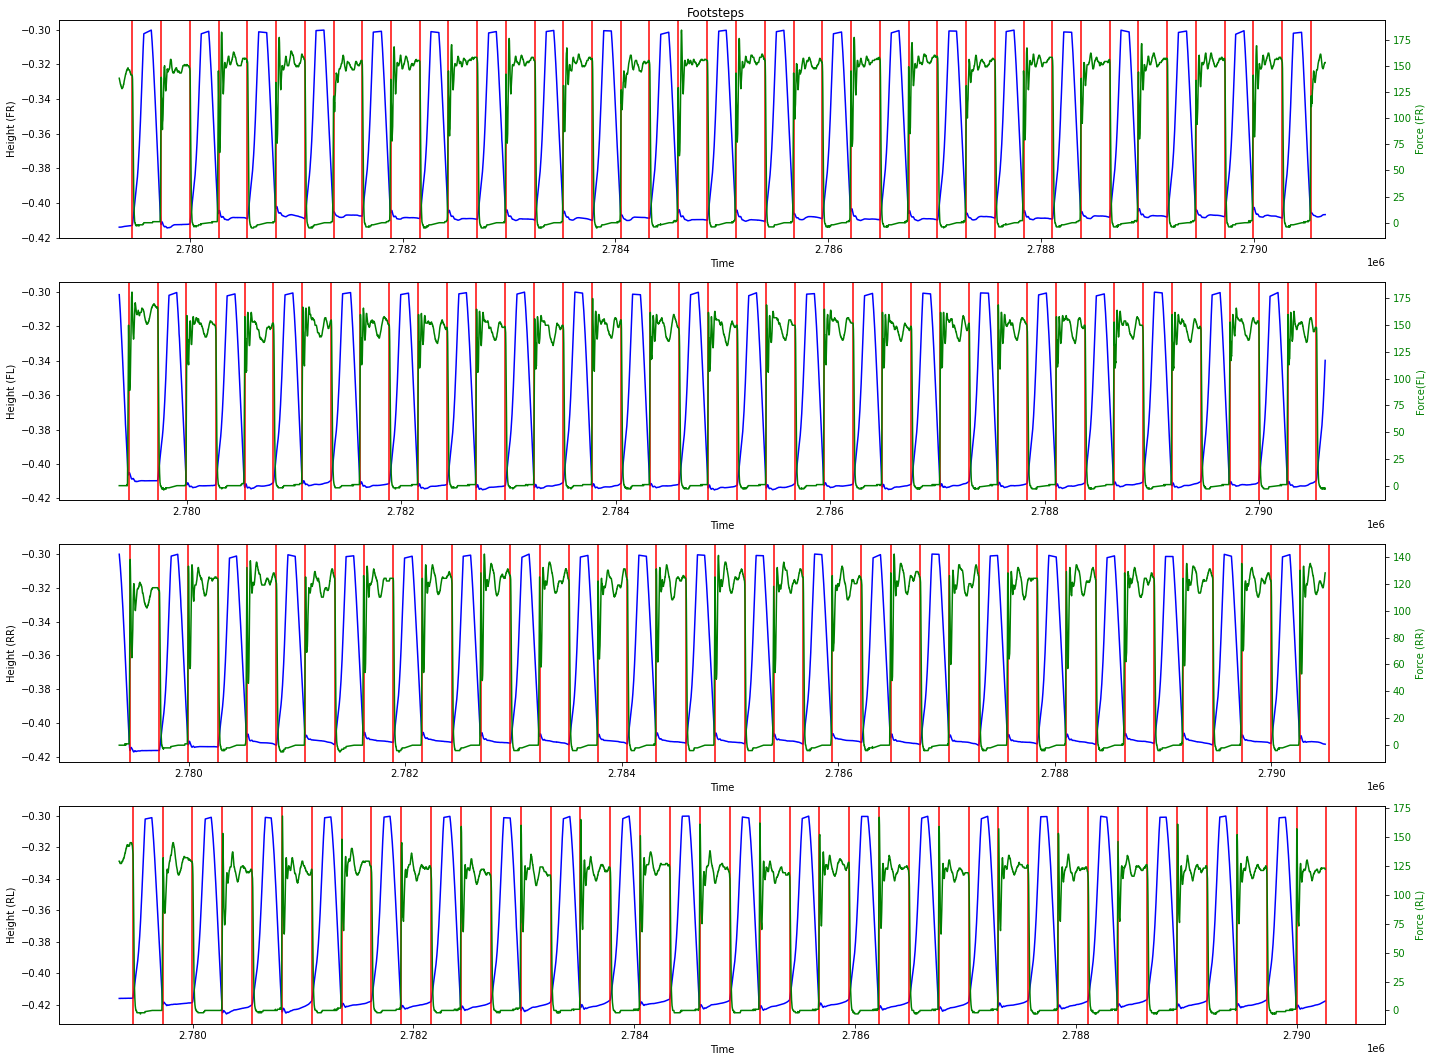

In [22]:
motion_03_side_left, footsteps_03_side_left = footstep_extraction_and_plotting(dataset=motion_03, velocities=[0, -velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 4900))

### Rotation (clockwise)

Foot swinging motions lenghts:  2913 3022 3063 2930
Min and max diff between front and rear feet 0.000353 0.264323 

Amount of footsteps found with height criteria:  1353 

Intersection with motion commands:  1353 

Intersection with no motion commands:  0 

Number of force footsteps:  82 

Number of height-force footsteps:  82 

Number of footsteps extracted with height-force due to motion:  82 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  82
Footsteps after non-maximum-suppression:  24


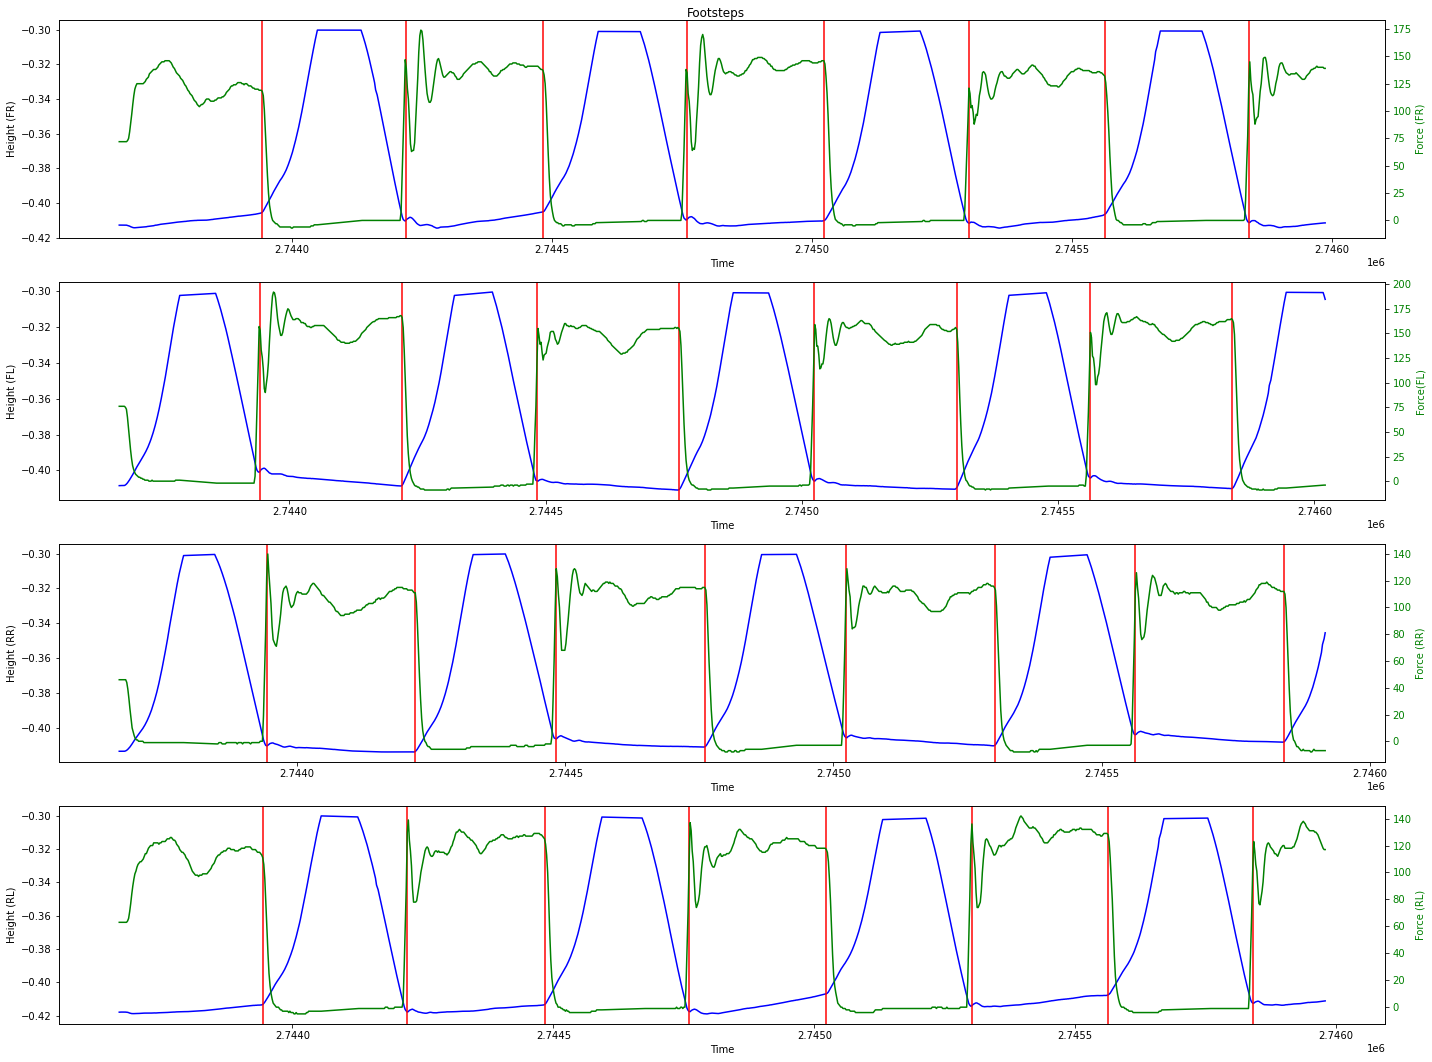

In [23]:
motion_03_clock, footsteps_03_clock = footstep_extraction_and_plotting(dataset=motion_03, velocities=[0, 0, velocity], height_threshold=0.1, force_thresholds=[90,90,90,90], indexes=range(0, 1000))

### Rotation (counter clockwise)

Foot swinging motions lenghts:  22273 21641 22006 22898
Min and max diff between front and rear feet 0.000108 0.268884 

Amount of footsteps found with height criteria:  10174 

Intersection with motion commands:  10174 

Intersection with no motion commands:  0 

Number of force footsteps:  776 

Number of height-force footsteps:  776 

Number of footsteps extracted with height-force due to motion:  776 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  776
Footsteps after non-maximum-suppression:  190


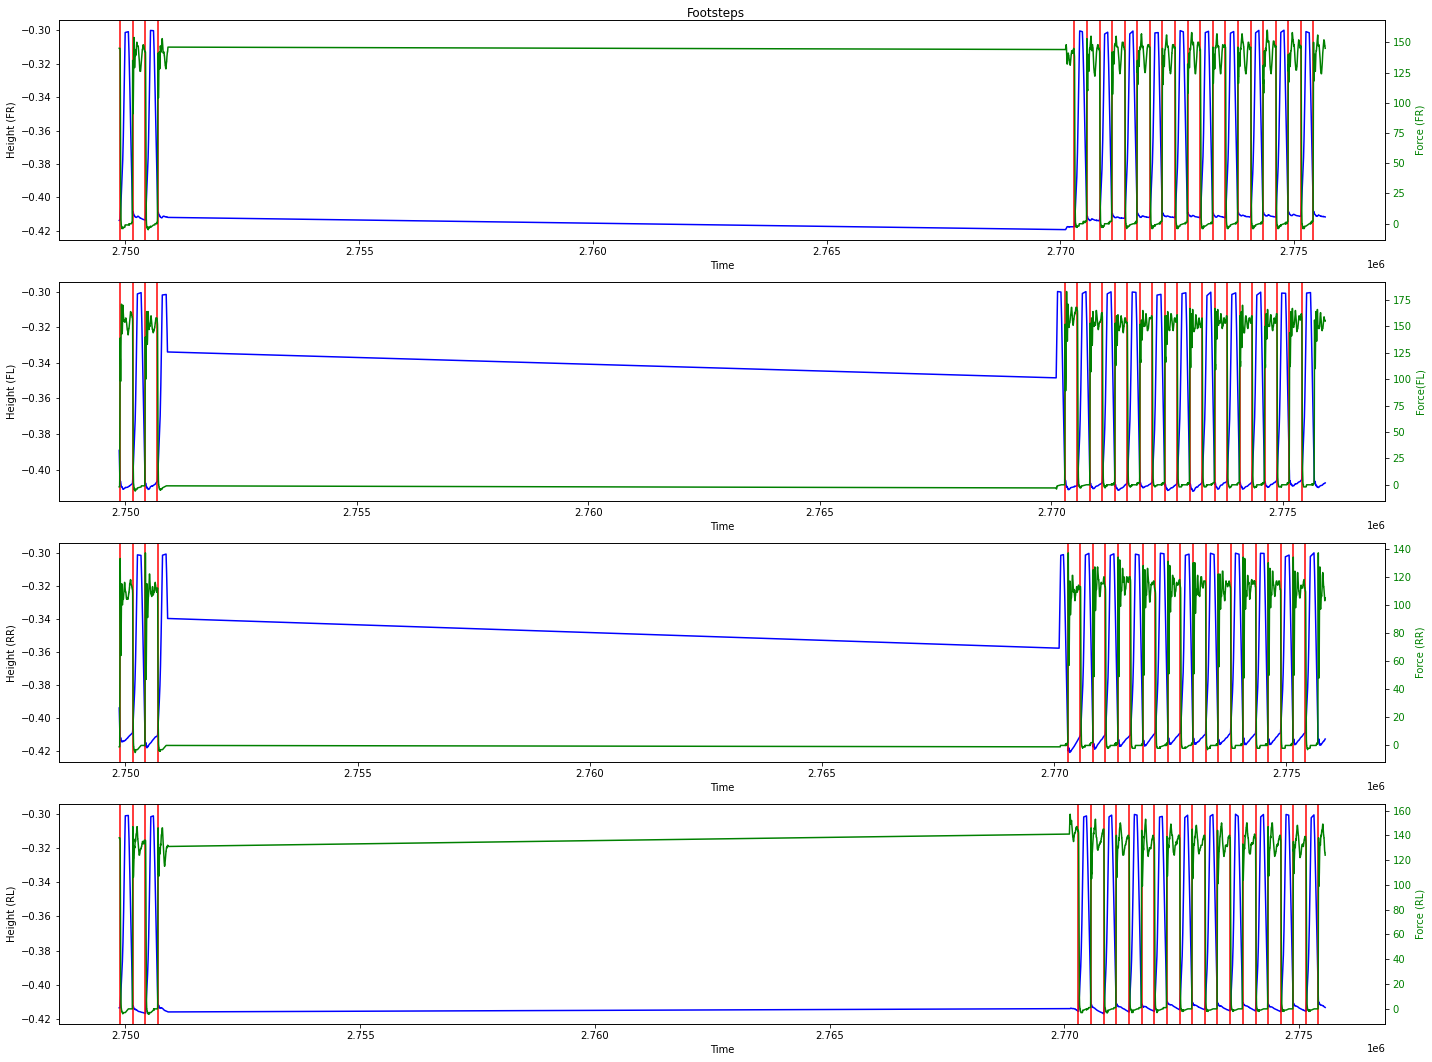

In [24]:
motion_03_count, footsteps_03_count = footstep_extraction_and_plotting(dataset=motion_03, velocities=[0, 0, -velocity], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 2900))

### Step size

In [25]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footstep_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                footstep_period.append(time_diff)
                step_size_fr.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fl.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_rr_numpy = np.array(step_size_rr)
    step_size_rl_numpy = np.array(step_size_rl)
    footstep_period_numpy = np.array(footstep_period)
    
    # Only keep positive footsteps
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_fl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    
    # Print average step-size
    print("Avg. step size time: ", np.mean(footstep_period_numpy))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr_numpy))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr_numpy))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

#### Forward motion

In [26]:
# Step size and velocity along x axis 
step_size_fr_x_fwd,_,_,_ = get_step_size(motion_03_fwd, footsteps_03_fwd)

Avg. step size time:  267.55828220858893
Avg. step size for FR foot:  0.11989362962962961
Avg. step size for FL foot:  0.11989362962962961
Avg. step size for RR foot:  0.11989362962962961
Avg. step size for RL foot:  0.11989362962962961 

Std. dev. step size for FR foot:  0.014640161215165483
Std. dev. step size for FL foot:  0.014640161215165483
Std. dev. step size for RR foot:  0.014640161215165483
Std. dev. step size for RL foot:  0.014640161215165483 



In [27]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_03_fwd, footsteps_03_fwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  267.55828220858893
Avg. step size for FR foot:  0.007199252564102565
Avg. step size for FL foot:  0.007199252564102565
Avg. step size for RR foot:  0.007199252564102565
Avg. step size for RL foot:  0.007199252564102565 

Std. dev. step size for FR foot:  0.011476065554668877
Std. dev. step size for FL foot:  0.011476065554668877
Std. dev. step size for RR foot:  0.011476065554668877
Std. dev. step size for RL foot:  0.011476065554668877 



### Backward motion

In [28]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_03_bwd, footsteps_03_bwd)

Avg. step size time:  271.2147651006711
Avg. step size for FR foot:  0.043948813333333336
Avg. step size for FL foot:  0.043948813333333336
Avg. step size for RR foot:  0.043948813333333336
Avg. step size for RL foot:  0.043948813333333336 

Std. dev. step size for FR foot:  0.007062078052421178
Std. dev. step size for FL foot:  0.007062078052421178
Std. dev. step size for RR foot:  0.007062078052421178
Std. dev. step size for RL foot:  0.007062078052421178 



In [29]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_03_bwd, footsteps_03_bwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  271.2147651006711
Avg. step size for FR foot:  0.03069592
Avg. step size for FL foot:  0.03069592
Avg. step size for RR foot:  0.03069592
Avg. step size for RL foot:  0.03069592 

Std. dev. step size for FR foot:  0.009255959234655263
Std. dev. step size for FL foot:  0.009255959234655263
Std. dev. step size for RR foot:  0.009255959234655263
Std. dev. step size for RL foot:  0.009255959234655263 



### Side motion (right)

In [30]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_03_side_right, footsteps_03_side_right)

Avg. step size time:  269.7659574468085
Avg. step size for FR foot:  0.0016910740740740731
Avg. step size for FL foot:  0.0016910740740740731
Avg. step size for RR foot:  0.0016910740740740731
Avg. step size for RL foot:  0.0016910740740740731 

Std. dev. step size for FR foot:  0.0016737896882341432
Std. dev. step size for FL foot:  0.0016737896882341432
Std. dev. step size for RR foot:  0.0016737896882341432
Std. dev. step size for RL foot:  0.0016737896882341432 



In [31]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_03_side_right, footsteps_03_side_right, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.7659574468085
Avg. step size for FR foot:  0.03579913043478261
Avg. step size for FL foot:  0.03579913043478261
Avg. step size for RR foot:  0.03579913043478261
Avg. step size for RL foot:  0.03579913043478261 

Std. dev. step size for FR foot:  0.009638379082128537
Std. dev. step size for FL foot:  0.009638379082128537
Std. dev. step size for RR foot:  0.009638379082128537
Std. dev. step size for RL foot:  0.009638379082128537 



### Side motions (left)

In [32]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_03_side_left, footsteps_03_side_left)

Avg. step size time:  270.1190476190476
Avg. step size for FR foot:  0.015963428571428576
Avg. step size for FL foot:  0.015963428571428576
Avg. step size for RR foot:  0.015963428571428576
Avg. step size for RL foot:  0.015963428571428576 

Std. dev. step size for FR foot:  0.002500596644449336
Std. dev. step size for FL foot:  0.002500596644449336
Std. dev. step size for RR foot:  0.002500596644449336
Std. dev. step size for RL foot:  0.002500596644449336 



In [33]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_03_side_left, footsteps_03_side_left, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.1190476190476
Avg. step size for FR foot:  0.0171255
Avg. step size for FL foot:  0.0171255
Avg. step size for RR foot:  0.0171255
Avg. step size for RL foot:  0.0171255 

Std. dev. step size for FR foot:  0.0057834905451953226
Std. dev. step size for FL foot:  0.0057834905451953226
Std. dev. step size for RR foot:  0.0057834905451953226
Std. dev. step size for RL foot:  0.0057834905451953226 



### Rotation (clockwise)

In [34]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_03_clock, footsteps_03_clock)

Avg. step size time:  270.15
Avg. step size for FR foot:  0.0246138
Avg. step size for FL foot:  0.0246138
Avg. step size for RR foot:  0.0246138
Avg. step size for RL foot:  0.0246138 

Std. dev. step size for FR foot:  0.003899443365404869
Std. dev. step size for FL foot:  0.003899443365404869
Std. dev. step size for RR foot:  0.003899443365404869
Std. dev. step size for RL foot:  0.003899443365404869 



In [35]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_03_clock, footsteps_03_clock, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.15
Avg. step size for FR foot:  0.03605900000000001
Avg. step size for FL foot:  0.03605900000000001
Avg. step size for RR foot:  0.03605900000000001
Avg. step size for RL foot:  0.03605900000000001 

Std. dev. step size for FR foot:  0.017519458627480475
Std. dev. step size for FL foot:  0.017519458627480475
Std. dev. step size for RR foot:  0.017519458627480475
Std. dev. step size for RL foot:  0.017519458627480475 



### Rotation (counter clockwise)

In [36]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_03_count, footsteps_03_count)

Avg. step size time:  269.1388888888889
Avg. step size for FR foot:  0.010424387096774193
Avg. step size for FL foot:  0.010424387096774193
Avg. step size for RR foot:  0.010424387096774193
Avg. step size for RL foot:  0.010424387096774193 

Std. dev. step size for FR foot:  0.002395707492118038
Std. dev. step size for FL foot:  0.002395707492118038
Std. dev. step size for RR foot:  0.002395707492118038
Std. dev. step size for RL foot:  0.002395707492118038 



In [37]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_03_count, footsteps_03_count, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.1388888888889
Avg. step size for FR foot:  0.0151026
Avg. step size for FL foot:  0.0151026
Avg. step size for RR foot:  0.0151026
Avg. step size for RL foot:  0.0151026 

Std. dev. step size for FR foot:  0.004929928037053514
Std. dev. step size for FL foot:  0.004929928037053514
Std. dev. step size for RR foot:  0.004929928037053514
Std. dev. step size for RL foot:  0.004929928037053514 



### Footstep visualization

In [38]:
def visualize_static_foosteps(dataset, footsteps):
    old_xs = None
    old_ys = None
    old_zs = None
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
        
        time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
        #if time_diff < 300:
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

        #print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])
        if idx > 0 and idx < len(footsteps):
            print(f'Diff: {time_diff}. Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}. Step size: {[xs[0]-old_xs[0], ys[0]-old_ys[0], zs[0]-old_zs[0]]}.')
        else:
            print(f'Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}.')
            
        old_xs = xs
        old_ys = ys
        old_zs = zs

In [39]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [40]:
def update_prediction_points(dataset, num, x, y, z, points):  
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points))
    
    return anim   

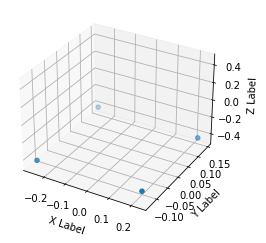

Time diff:  263.0
Footstep timestamp:  2752854.0
Height check index:  124
Height check timestamp:  2752953.0

FL moving: 0.09756500000000001. FR moving: 0.0018940000000000068
RL moving: 0.0023290000000000255. RR moving: 0.10099000000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.418288. FR later: -0.416394
RR moving: -0.407903. RL moving: -0.310338

Coord FR: [0.217, -0.119, -0.418]. Coord FL: [0.228, 0.136, -0.408]. Coord RR: [-0.255, -0.129, -0.416]. Coord RL: [-0.262, 0.145, -0.411]

FR step_size: 0.094107. FL step_size: 0. RR step size: 0. RL step_size: 0.10022399999999998.


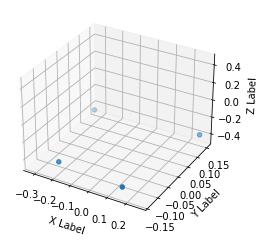

Time diff:  267.0
Footstep timestamp:  2753117.0
Height check index:  255
Height check timestamp:  2753216.0

FL moving: 0.003591000000000011. FR moving: 0.09129900000000002
RL moving: 0.08803499999999997. RR moving: 0.00013799999999997148

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.408171. FR later: -0.316872
RR moving: -0.393407. RL moving: -0.396998

Coord FR: [0.157, -0.136, -0.408]. Coord FL: [0.262, 0.151, -0.393]. Coord RR: [-0.214, -0.117, -0.412]. Coord RL: [-0.321, 0.133, -0.408]

FR step_size: 0.25261100000000003. FL step_size: 0. RR step size: 0. RL step_size: 0.24390200000000004.


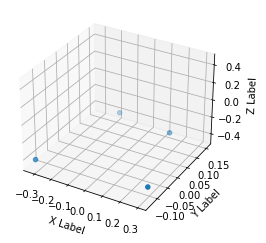

Time diff:  267.0
Footstep timestamp:  2753384.0
Height check index:  388
Height check timestamp:  2753483.0

FL moving: 0.08952100000000002. FR moving: 0.0020020000000000038
RL moving: 0.005551000000000028. RR moving: 0.09309100000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.39947. FR later: -0.401472
RR moving: -0.394542. RL moving: -0.305021

Coord FR: [0.299, -0.107, -0.399]. Coord FL: [0.152, 0.127, -0.395]. Coord RR: [-0.321, -0.133, -0.412]. Coord RL: [-0.185, 0.154, -0.404]

FR step_size: 0.265104. FL step_size: 0. RR step size: 0. RL step_size: 0.25383599999999995.


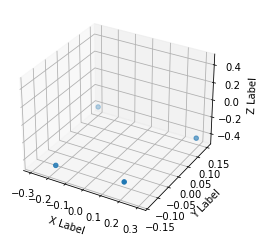

Time diff:  270.0
Footstep timestamp:  2753651.0
Height check index:  521
Height check timestamp:  2753750.0

FL moving: 0.0037289999999999823. FR moving: 0.09254000000000001
RL moving: 0.089252. RR moving: 0.004363999999999979

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397836. FR later: -0.305296
RR moving: -0.392253. RL moving: -0.395982

Coord FR: [0.183, -0.119, -0.398]. Coord FL: [0.301, 0.131, -0.392]. Coord RR: [-0.18, -0.136, -0.404]. Coord RL: [-0.298, 0.149, -0.409]

FR step_size: 0.237145. FL step_size: 0. RR step size: 0. RL step_size: 0.240527.


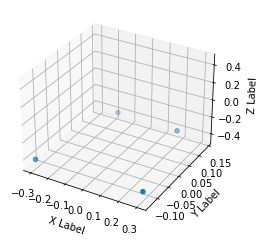

Time diff:  1078.0


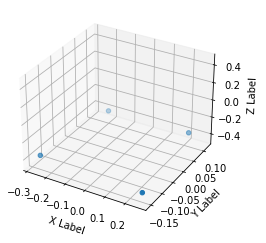

Time diff:  261.0
Footstep timestamp:  2754999.0
Height check index:  953
Height check timestamp:  2755099.0

FL moving: 0.09778300000000001. FR moving: 0.0025550000000000295
RL moving: 0.00016599999999999948. RR moving: 0.097142

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.400122. FR later: -0.402677
RR moving: -0.406194. RL moving: -0.308411

Coord FR: [0.261, -0.153, -0.4]. Coord FL: [0.205, 0.117, -0.406]. Coord RR: [-0.278, -0.134, -0.409]. Coord RL: [-0.22, 0.116, -0.418]

FR step_size: 0.18551500000000004. FL step_size: 0. RR step size: 0. RL step_size: 0.185754.


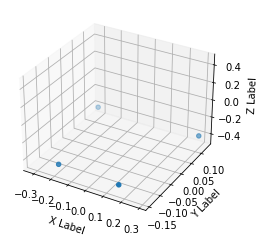

Time diff:  273.0
Footstep timestamp:  2755260.0
Height check index:  1083
Height check timestamp:  2755360.0

FL moving: 0.0011810000000000431. FR moving: 0.08690399999999998
RL moving: 0.08503099999999997. RR moving: 0.003608

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395931. FR later: -0.309027
RR moving: -0.395796. RL moving: -0.396977

Coord FR: [0.162, -0.145, -0.396]. Coord FL: [0.291, 0.125, -0.396]. Coord RR: [-0.189, -0.139, -0.401]. Coord RL: [-0.317, 0.129, -0.412]

FR step_size: 0.2594949999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.257909.


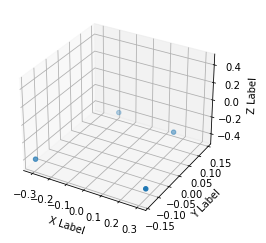

Time diff:  265.0
Footstep timestamp:  2755533.0
Height check index:  1219
Height check timestamp:  2755633.0

FL moving: 0.09606300000000001. FR moving: 0.0033829999999999694
RL moving: 0.0049839999999999884. RR moving: 0.09440700000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.396342. FR later: -0.399725
RR moving: -0.394728. RL moving: -0.298665

Coord FR: [0.303, -0.122, -0.396]. Coord FL: [0.173, 0.124, -0.395]. Coord RR: [-0.309, -0.138, -0.407]. Coord RL: [-0.18, 0.143, -0.405]

FR step_size: 0.24773900000000001. FL step_size: 0. RR step size: 0. RL step_size: 0.24766400000000002.


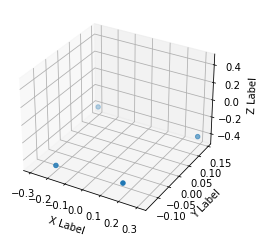

Time diff:  271.0
Footstep timestamp:  2755798.0
Height check index:  1351
Height check timestamp:  2755898.0

FL moving: 0.0031859999999999666. FR moving: 0.093833
RL moving: 0.09084400000000004. RR moving: 0.0049200000000000355

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397368. FR later: -0.303535
RR moving: -0.390537. RL moving: -0.393723

Coord FR: [0.185, -0.125, -0.397]. Coord FL: [0.303, 0.133, -0.391]. Coord RR: [-0.178, -0.136, -0.404]. Coord RL: [-0.297, 0.143, -0.409]

FR step_size: 0.237212. FL step_size: 0. RR step size: 0. RL step_size: 0.23958.


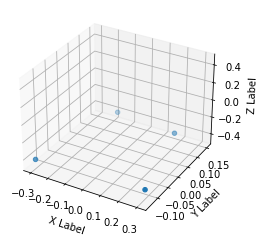

Time diff:  267.0
Footstep timestamp:  2756069.0
Height check index:  1486
Height check timestamp:  2756170.0

FL moving: 0.09733199999999997. FR moving: 0.0025179999999999647
RL moving: 0.005543999999999993. RR moving: 0.097161

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.397633. FR later: -0.400151
RR moving: -0.393875. RL moving: -0.296543

Coord FR: [0.304, -0.122, -0.398]. Coord FL: [0.185, 0.128, -0.394]. Coord RR: [-0.299, -0.135, -0.41]. Coord RL: [-0.179, 0.151, -0.405]

FR step_size: 0.235034. FL step_size: 0. RR step size: 0. RL step_size: 0.238476.


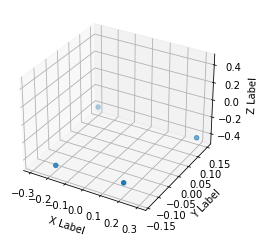

Time diff:  269.0
Footstep timestamp:  2756336.0
Height check index:  1618
Height check timestamp:  2756435.0

FL moving: 0.003066000000000013. FR moving: 0.09551099999999996
RL moving: 0.092673. RR moving: 0.0036219999999999586

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396908. FR later: -0.301397
RR moving: -0.391959. RL moving: -0.395025

Coord FR: [0.186, -0.126, -0.397]. Coord FL: [0.302, 0.132, -0.392]. Coord RR: [-0.179, -0.139, -0.404]. Coord RL: [-0.297, 0.148, -0.41]

FR step_size: 0.23737099999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.24165999999999999.


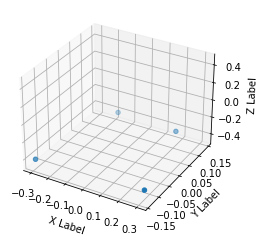

Time diff:  267.0
Footstep timestamp:  2756605.0
Height check index:  1752
Height check timestamp:  2756704.0

FL moving: 0.09581700000000004. FR moving: 0.0033380000000000076
RL moving: 0.00431400000000004. RR moving: 0.094912

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.395656. FR later: -0.398994
RR moving: -0.395054. RL moving: -0.299237

Coord FR: [0.305, -0.129, -0.396]. Coord FL: [0.183, 0.129, -0.395]. Coord RR: [-0.3, -0.139, -0.408]. Coord RL: [-0.177, 0.142, -0.406]

FR step_size: 0.24134999999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.24243900000000002.


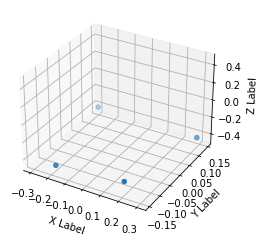

Time diff:  269.0
Footstep timestamp:  2756872.0
Height check index:  1885
Height check timestamp:  2756971.0

FL moving: 0.002652999999999961. FR moving: 0.09482099999999999
RL moving: 0.09279799999999999. RR moving: 0.004832000000000003

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395965. FR later: -0.301144
RR moving: -0.39328. RL moving: -0.395933

Coord FR: [0.185, -0.128, -0.396]. Coord FL: [0.304, 0.129, -0.393]. Coord RR: [-0.178, -0.146, -0.403]. Coord RL: [-0.297, 0.144, -0.411]

FR step_size: 0.235868. FL step_size: 0. RR step size: 0. RL step_size: 0.240532.


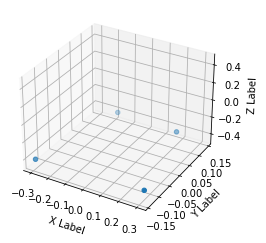

Time diff:  265.0
Footstep timestamp:  2757141.0
Height check index:  2019
Height check timestamp:  2757240.0

FL moving: 0.09679699999999997. FR moving: 0.0033230000000000204
RL moving: 0.0036459999999999826. RR moving: 0.09459799999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.396271. FR later: -0.399594
RR moving: -0.3959. RL moving: -0.299103

Coord FR: [0.304, -0.131, -0.396]. Coord FL: [0.187, 0.127, -0.396]. Coord RR: [-0.3, -0.14, -0.408]. Coord RL: [-0.179, 0.141, -0.407]

FR step_size: 0.235806. FL step_size: 0. RR step size: 0. RL step_size: 0.24195099999999997.


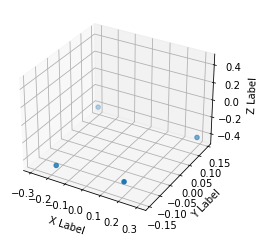

Time diff:  270.0
Footstep timestamp:  2757406.0
Height check index:  2151
Height check timestamp:  2757505.0

FL moving: 0.002690999999999999. FR moving: 0.09355400000000003
RL moving: 0.09120899999999998. RR moving: 0.005041999999999991

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396473. FR later: -0.302919
RR moving: -0.392759. RL moving: -0.39545

Coord FR: [0.185, -0.129, -0.396]. Coord FL: [0.304, 0.129, -0.393]. Coord RR: [-0.177, -0.146, -0.403]. Coord RL: [-0.298, 0.143, -0.411]

FR step_size: 0.23858. FL step_size: 0. RR step size: 0. RL step_size: 0.24419100000000002.


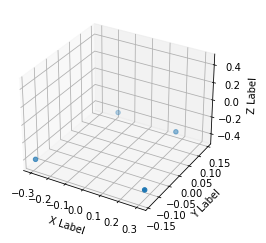

Time diff:  267.0
Footstep timestamp:  2757676.0
Height check index:  2286
Height check timestamp:  2757776.0

FL moving: 0.09633999999999998. FR moving: 0.0036430000000000073
RL moving: 0.0037890000000000423. RR moving: 0.09493199999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.396318. FR later: -0.399961
RR moving: -0.395391. RL moving: -0.299051

Coord FR: [0.305, -0.129, -0.396]. Coord FL: [0.185, 0.129, -0.395]. Coord RR: [-0.3, -0.14, -0.409]. Coord RL: [-0.177, 0.144, -0.407]

FR step_size: 0.23829000000000003. FL step_size: 0. RR step size: 0. RL step_size: 0.242536.


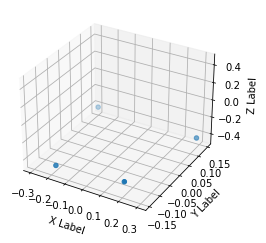

Time diff:  269.0
Footstep timestamp:  2757943.0
Height check index:  2419
Height check timestamp:  2758043.0

FL moving: 0.0026610000000000245. FR moving: 0.09520999999999996
RL moving: 0.09336300000000003. RR moving: 0.0050200000000000244

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396885. FR later: -0.301675
RR moving: -0.393457. RL moving: -0.396118

Coord FR: [0.185, -0.128, -0.397]. Coord FL: [0.303, 0.129, -0.393]. Coord RR: [-0.178, -0.146, -0.404]. Coord RL: [-0.297, 0.146, -0.411]

FR step_size: 0.235228. FL step_size: 0. RR step size: 0. RL step_size: 0.240123.


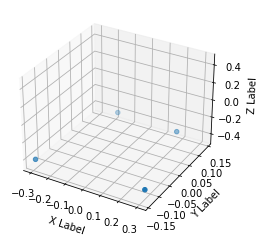

Time diff:  265.0
Footstep timestamp:  2758212.0
Height check index:  2553
Height check timestamp:  2758312.0

FL moving: 0.09800600000000004. FR moving: 0.0029930000000000234
RL moving: 0.0038739999999999886. RR moving: 0.09612399999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.396134. FR later: -0.399127
RR moving: -0.395525. RL moving: -0.297519

Coord FR: [0.304, -0.129, -0.396]. Coord FL: [0.187, 0.129, -0.396]. Coord RR: [-0.299, -0.141, -0.409]. Coord RL: [-0.178, 0.142, -0.408]

FR step_size: 0.237335. FL step_size: 0. RR step size: 0. RL step_size: 0.241188.


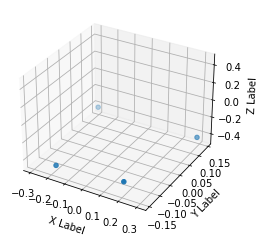

Time diff:  269.0
Footstep timestamp:  2758477.0
Height check index:  2685
Height check timestamp:  2758577.0

FL moving: 0.0033530000000000504. FR moving: 0.09357700000000002
RL moving: 0.091837. RR moving: 0.004850999999999994

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396368. FR later: -0.302791
RR moving: -0.392406. RL moving: -0.395759

Coord FR: [0.185, -0.129, -0.396]. Coord FL: [0.305, 0.129, -0.392]. Coord RR: [-0.176, -0.146, -0.403]. Coord RL: [-0.296, 0.143, -0.412]

FR step_size: 0.237014. FL step_size: 0. RR step size: 0. RL step_size: 0.240719.


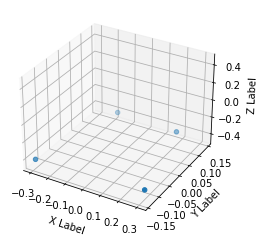

Time diff:  267.0
Footstep timestamp:  2758746.0
Height check index:  2819
Height check timestamp:  2758846.0

FL moving: 0.095163. FR moving: 0.0038730000000000153
RL moving: 0.0036209999999999853. RR moving: 0.09350599999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.395897. FR later: -0.39977
RR moving: -0.395819. RL moving: -0.300656

Coord FR: [0.304, -0.129, -0.396]. Coord FL: [0.187, 0.128, -0.396]. Coord RR: [-0.298, -0.14, -0.409]. Coord RL: [-0.178, 0.142, -0.408]

FR step_size: 0.235891. FL step_size: 0. RR step size: 0. RL step_size: 0.24006199999999997.


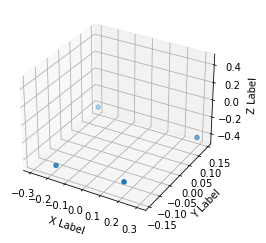

Time diff:  269.0
Footstep timestamp:  2759013.0
Height check index:  2952
Height check timestamp:  2759113.0

FL moving: 0.003418000000000032. FR moving: 0.093717
RL moving: 0.09186599999999995. RR moving: 0.0047439999999999705

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396748. FR later: -0.303031
RR moving: -0.392651. RL moving: -0.396069

Coord FR: [0.185, -0.128, -0.397]. Coord FL: [0.304, 0.13, -0.393]. Coord RR: [-0.177, -0.145, -0.403]. Coord RL: [-0.297, 0.144, -0.411]

FR step_size: 0.23611200000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.24077.


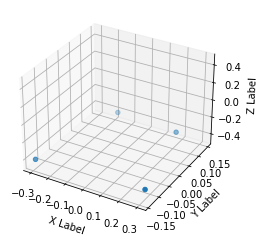

Time diff:  267.0
Footstep timestamp:  2759282.0
Height check index:  3086
Height check timestamp:  2759382.0

FL moving: 0.09651199999999999. FR moving: 0.0030509999999999704
RL moving: 0.003807999999999978. RR moving: 0.09480299999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.396004. FR later: -0.399055
RR moving: -0.395673. RL moving: -0.299161

Coord FR: [0.303, -0.127, -0.396]. Coord FL: [0.186, 0.129, -0.396]. Coord RR: [-0.299, -0.14, -0.409]. Coord RL: [-0.178, 0.145, -0.407]

FR step_size: 0.23541800000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.240017.


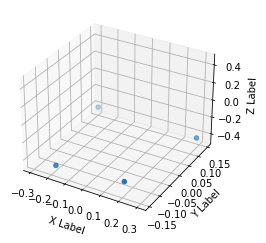

Time diff:  269.0
Footstep timestamp:  2759549.0
Height check index:  3219
Height check timestamp:  2759649.0

FL moving: 0.0024820000000000397. FR moving: 0.09527000000000002
RL moving: 0.09341300000000002. RR moving: 0.0047800000000000065

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396164. FR later: -0.300894
RR moving: -0.393373. RL moving: -0.395855

Coord FR: [0.185, -0.128, -0.396]. Coord FL: [0.303, 0.13, -0.393]. Coord RR: [-0.177, -0.146, -0.403]. Coord RL: [-0.296, 0.147, -0.411]

FR step_size: 0.23476099999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.239899.


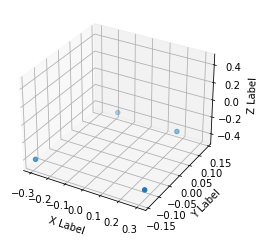

Time diff:  267.0
Footstep timestamp:  2759818.0
Height check index:  3353
Height check timestamp:  2759918.0

FL moving: 0.09642200000000001. FR moving: 0.003550999999999971
RL moving: 0.0036730000000000373. RR moving: 0.095059

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.395768. FR later: -0.399319
RR moving: -0.396051. RL moving: -0.299629

Coord FR: [0.304, -0.129, -0.396]. Coord FL: [0.187, 0.129, -0.396]. Coord RR: [-0.299, -0.14, -0.409]. Coord RL: [-0.178, 0.141, -0.408]

FR step_size: 0.23568299999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.240301.


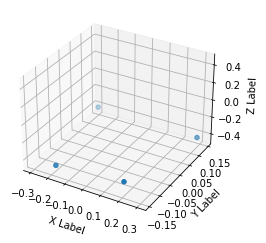

Time diff:  269.0
Footstep timestamp:  2760085.0
Height check index:  3485
Height check timestamp:  2760184.0

FL moving: 0.002768000000000048. FR moving: 0.093725
RL moving: 0.09140399999999999. RR moving: 0.004931000000000019

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396352. FR later: -0.302627
RR moving: -0.393962. RL moving: -0.39673

Coord FR: [0.184, -0.129, -0.396]. Coord FL: [0.303, 0.129, -0.394]. Coord RR: [-0.178, -0.146, -0.403]. Coord RL: [-0.297, 0.143, -0.411]

FR step_size: 0.23634499999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.24080000000000001.


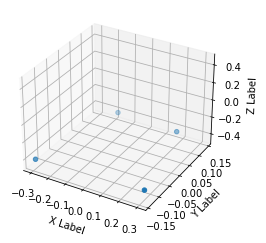

Time diff:  267.0
Footstep timestamp:  2760354.0
Height check index:  3619
Height check timestamp:  2760453.0

FL moving: 0.09498299999999998. FR moving: 0.003367000000000009
RL moving: 0.003709000000000018. RR moving: 0.09346699999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.396271. FR later: -0.399638
RR moving: -0.396317. RL moving: -0.301334

Coord FR: [0.303, -0.13, -0.396]. Coord FL: [0.186, 0.128, -0.396]. Coord RR: [-0.3, -0.14, -0.408]. Coord RL: [-0.178, 0.141, -0.408]

FR step_size: 0.235922. FL step_size: 0. RR step size: 0. RL step_size: 0.24183.


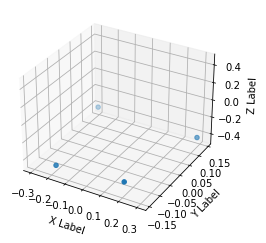

Time diff:  269.0
Footstep timestamp:  2760621.0
Height check index:  3752
Height check timestamp:  2760720.0

FL moving: 0.0027129999999999654. FR moving: 0.09384000000000003
RL moving: 0.09161200000000003. RR moving: 0.004769000000000023

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396587. FR later: -0.302747
RR moving: -0.393919. RL moving: -0.396632

Coord FR: [0.185, -0.129, -0.397]. Coord FL: [0.303, 0.129, -0.394]. Coord RR: [-0.178, -0.146, -0.402]. Coord RL: [-0.298, 0.143, -0.411]

FR step_size: 0.23457. FL step_size: 0. RR step size: 0. RL step_size: 0.241111.


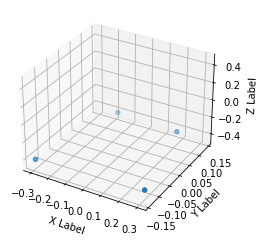

Time diff:  267.0
Footstep timestamp:  2760890.0
Height check index:  3886
Height check timestamp:  2760989.0

FL moving: 0.09530099999999997. FR moving: 0.0035630000000000384
RL moving: 0.0034740000000000326. RR moving: 0.09332999999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.396815. FR later: -0.400378
RR moving: -0.396497. RL moving: -0.301196

Coord FR: [0.303, -0.13, -0.397]. Coord FL: [0.187, 0.128, -0.396]. Coord RR: [-0.3, -0.141, -0.408]. Coord RL: [-0.179, 0.141, -0.408]

FR step_size: 0.23599399999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.243079.


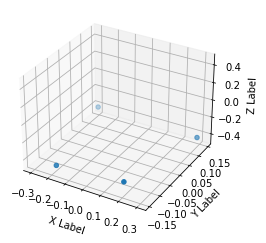

Time diff:  270.0
Footstep timestamp:  2761157.0
Height check index:  4019
Height check timestamp:  2761256.0

FL moving: 0.0027760000000000007. FR moving: 0.09351999999999999
RL moving: 0.09143499999999999. RR moving: 0.00487700000000002

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397017. FR later: -0.303497
RR moving: -0.393737. RL moving: -0.396513

Coord FR: [0.184, -0.129, -0.397]. Coord FL: [0.304, 0.13, -0.394]. Coord RR: [-0.177, -0.146, -0.402]. Coord RL: [-0.299, 0.144, -0.41]

FR step_size: 0.23698699999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.24287.


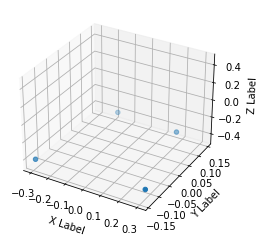

Time diff:  267.0
Footstep timestamp:  2761427.0
Height check index:  4154
Height check timestamp:  2761527.0

FL moving: 0.09807199999999999. FR moving: 0.0031019999999999937
RL moving: 0.0040819999999999745. RR moving: 0.09609599999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.398071. FR later: -0.401173
RR moving: -0.39629. RL moving: -0.298218

Coord FR: [0.303, -0.127, -0.398]. Coord FL: [0.187, 0.129, -0.396]. Coord RR: [-0.299, -0.141, -0.408]. Coord RL: [-0.178, 0.144, -0.406]

FR step_size: 0.23475899999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.24124099999999998.


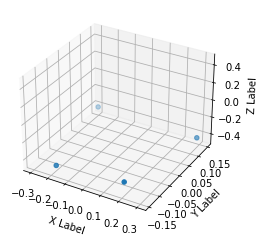

Time diff:  269.0
Footstep timestamp:  2761694.0
Height check index:  4287
Height check timestamp:  2761794.0

FL moving: 0.0019810000000000105. FR moving: 0.09648600000000002
RL moving: 0.09454699999999999. RR moving: 0.004740000000000022

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397899. FR later: -0.301413
RR moving: -0.394858. RL moving: -0.396839

Coord FR: [0.185, -0.127, -0.398]. Coord FL: [0.303, 0.131, -0.395]. Coord RR: [-0.177, -0.144, -0.403]. Coord RL: [-0.298, 0.146, -0.409]

FR step_size: 0.23350900000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.23942600000000003.


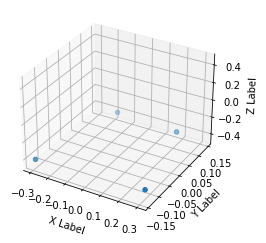

Time diff:  267.0
Footstep timestamp:  2761963.0
Height check index:  4421
Height check timestamp:  2762063.0

FL moving: 0.096464. FR moving: 0.003699999999999981
RL moving: 0.0036390000000000033. RR moving: 0.095283

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.398955. FR later: -0.402655
RR moving: -0.396761. RL moving: -0.300297

Coord FR: [0.303, -0.128, -0.399]. Coord FL: [0.187, 0.129, -0.397]. Coord RR: [-0.297, -0.141, -0.409]. Coord RL: [-0.178, 0.143, -0.407]

FR step_size: 0.23579599999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.23987899999999998.


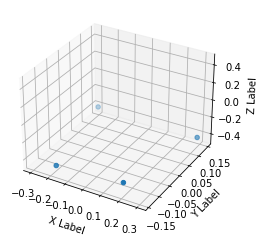

Time diff:  269.0
Footstep timestamp:  2762230.0
Height check index:  4554
Height check timestamp:  2762330.0

FL moving: 0.0030300000000000327. FR moving: 0.095244
RL moving: 0.092613. RR moving: 0.003957000000000044

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399444. FR later: -0.3042
RR moving: -0.394972. RL moving: -0.398002

Coord FR: [0.184, -0.128, -0.399]. Coord FL: [0.303, 0.131, -0.395]. Coord RR: [-0.177, -0.142, -0.404]. Coord RL: [-0.298, 0.144, -0.409]

FR step_size: 0.23669099999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.24016500000000002.


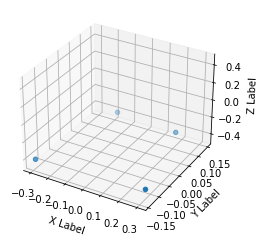

Time diff:  267.0
Footstep timestamp:  2762499.0
Height check index:  4688
Height check timestamp:  2762599.0

FL moving: 0.09646100000000002. FR moving: 0.0030970000000000164
RL moving: 0.0036439999999999806. RR moving: 0.094978

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.399377. FR later: -0.402474
RR moving: -0.396839. RL moving: -0.300378

Coord FR: [0.303, -0.126, -0.399]. Coord FL: [0.185, 0.129, -0.397]. Coord RR: [-0.298, -0.141, -0.408]. Coord RL: [-0.179, 0.146, -0.406]

FR step_size: 0.23613699999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.23852399999999996.


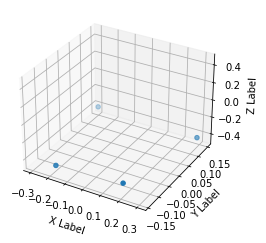

Time diff:  269.0
Footstep timestamp:  2762766.0
Height check index:  4821
Height check timestamp:  2762866.0

FL moving: 0.003008999999999984. FR moving: 0.09540500000000002
RL moving: 0.09300599999999998. RR moving: 0.003740000000000021

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399533. FR later: -0.304128
RR moving: -0.394913. RL moving: -0.397922

Coord FR: [0.185, -0.128, -0.4]. Coord FL: [0.303, 0.132, -0.395]. Coord RR: [-0.178, -0.14, -0.404]. Coord RL: [-0.297, 0.146, -0.408]

FR step_size: 0.23504699999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.237395.


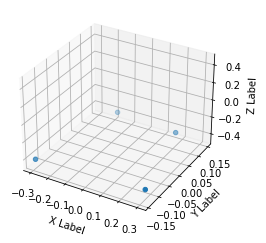

Time diff:  267.0
Footstep timestamp:  2763035.0
Height check index:  4955
Height check timestamp:  2763135.0

FL moving: 0.09684300000000001. FR moving: 0.003033999999999981
RL moving: 0.00367099999999998. RR moving: 0.09450399999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.399021. FR later: -0.402055
RR moving: -0.397017. RL moving: -0.300174

Coord FR: [0.302, -0.127, -0.399]. Coord FL: [0.185, 0.127, -0.397]. Coord RR: [-0.298, -0.141, -0.408]. Coord RL: [-0.179, 0.145, -0.406]

FR step_size: 0.23568099999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.23886399999999997.


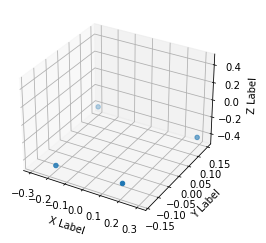

Time diff:  269.0
Footstep timestamp:  2763302.0
Height check index:  5088
Height check timestamp:  2763402.0

FL moving: 0.003179000000000043. FR moving: 0.09536700000000004
RL moving: 0.093034. RR moving: 0.003827999999999998

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399191. FR later: -0.303824
RR moving: -0.394178. RL moving: -0.397357

Coord FR: [0.184, -0.128, -0.399]. Coord FL: [0.303, 0.133, -0.394]. Coord RR: [-0.178, -0.138, -0.405]. Coord RL: [-0.297, 0.146, -0.408]

FR step_size: 0.23652199999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.237739.


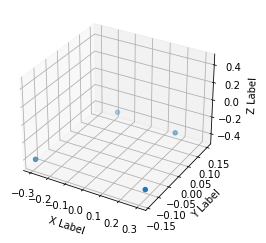

Time diff:  267.0
Footstep timestamp:  2763571.0
Height check index:  5222
Height check timestamp:  2763672.0

FL moving: 0.09645599999999999. FR moving: 0.003041000000000016
RL moving: 0.004284999999999983. RR moving: 0.09497

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.399298. FR later: -0.402339
RR moving: -0.396395. RL moving: -0.299939

Coord FR: [0.303, -0.125, -0.399]. Coord FL: [0.185, 0.129, -0.396]. Coord RR: [-0.298, -0.139, -0.409]. Coord RL: [-0.179, 0.149, -0.406]

FR step_size: 0.23532099999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.237623.


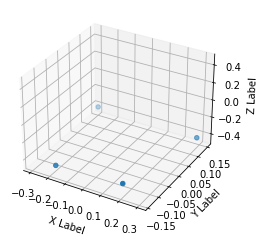

Time diff:  271.0
Footstep timestamp:  2763838.0
Height check index:  5354
Height check timestamp:  2763937.0

FL moving: 0.0029449999999999754. FR moving: 0.093918
RL moving: 0.09027800000000002. RR moving: 0.004056000000000004

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399413. FR later: -0.305495
RR moving: -0.393973. RL moving: -0.396918

Coord FR: [0.185, -0.129, -0.399]. Coord FL: [0.302, 0.132, -0.394]. Coord RR: [-0.178, -0.139, -0.404]. Coord RL: [-0.296, 0.147, -0.409]

FR step_size: 0.236623. FL step_size: 0. RR step size: 0. RL step_size: 0.237401.


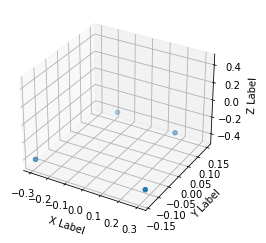

Time diff:  267.0
Footstep timestamp:  2764109.0
Height check index:  5489
Height check timestamp:  2764208.0

FL moving: 0.09441099999999997. FR moving: 0.002807000000000004
RL moving: 0.0045379999999999865. RR moving: 0.09370300000000004

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.399627. FR later: -0.402434
RR moving: -0.396053. RL moving: -0.301642

Coord FR: [0.303, -0.125, -0.4]. Coord FL: [0.184, 0.129, -0.396]. Coord RR: [-0.298, -0.139, -0.409]. Coord RL: [-0.179, 0.149, -0.406]

FR step_size: 0.23591999999999996. FL step_size: 0. RR step size: 0. RL step_size: 0.237709.


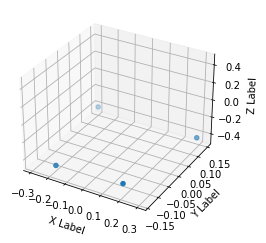

Time diff:  269.0
Footstep timestamp:  2764376.0
Height check index:  5622
Height check timestamp:  2764475.0

FL moving: 0.0030639999999999556. FR moving: 0.09386500000000003
RL moving: 0.09128199999999997. RR moving: 0.003693000000000002

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.399463. FR later: -0.305598
RR moving: -0.394392. RL moving: -0.397456

Coord FR: [0.186, -0.128, -0.399]. Coord FL: [0.302, 0.132, -0.394]. Coord RR: [-0.178, -0.138, -0.404]. Coord RL: [-0.297, 0.147, -0.409]

FR step_size: 0.23389999999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.238188.


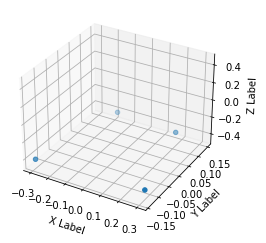

Time diff:  267.0
Footstep timestamp:  2764645.0
Height check index:  5756
Height check timestamp:  2764744.0

FL moving: 0.09471000000000002. FR moving: 0.0030729999999999924
RL moving: 0.003987000000000018. RR moving: 0.09334900000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.399032. FR later: -0.402105
RR moving: -0.396591. RL moving: -0.301881

Coord FR: [0.303, -0.127, -0.399]. Coord FL: [0.185, 0.129, -0.397]. Coord RR: [-0.298, -0.139, -0.408]. Coord RL: [-0.179, 0.146, -0.406]

FR step_size: 0.235978. FL step_size: 0. RR step size: 0. RL step_size: 0.238194.


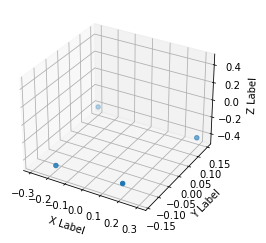

Time diff:  270.0
Footstep timestamp:  2764912.0
Height check index:  5889
Height check timestamp:  2765011.0

FL moving: 0.002589000000000008. FR moving: 0.09550899999999996
RL moving: 0.09115299999999998. RR moving: 0.0036119999999999486

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.39896. FR later: -0.303451
RR moving: -0.393982. RL moving: -0.396571

Coord FR: [0.185, -0.129, -0.399]. Coord FL: [0.303, 0.132, -0.394]. Coord RR: [-0.178, -0.139, -0.405]. Coord RL: [-0.297, 0.147, -0.409]

FR step_size: 0.23739900000000003. FL step_size: 0. RR step size: 0. RL step_size: 0.23825499999999997.


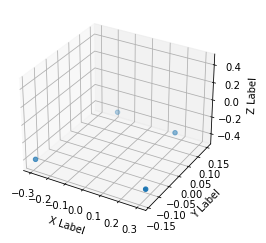

Time diff:  265.0
Footstep timestamp:  2765182.0
Height check index:  6024
Height check timestamp:  2765282.0

FL moving: 0.09764600000000001. FR moving: 0.0022500000000000298
RL moving: 0.0047940000000000205. RR moving: 0.096387

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.398512. FR later: -0.400762
RR moving: -0.3957. RL moving: -0.298054

Coord FR: [0.303, -0.125, -0.399]. Coord FL: [0.184, 0.129, -0.396]. Coord RR: [-0.298, -0.141, -0.409]. Coord RL: [-0.179, 0.149, -0.405]

FR step_size: 0.235095. FL step_size: 0. RR step size: 0. RL step_size: 0.23625200000000002.


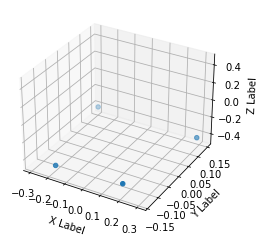

Time diff:  271.0
Footstep timestamp:  2765447.0
Height check index:  6156
Height check timestamp:  2765547.0

FL moving: 0.003390000000000004. FR moving: 0.095331
RL moving: 0.09217199999999998. RR moving: 0.004288000000000014

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.398097. FR later: -0.302766
RR moving: -0.392791. RL moving: -0.396181

Coord FR: [0.187, -0.128, -0.398]. Coord FL: [0.303, 0.132, -0.393]. Coord RR: [-0.178, -0.137, -0.405]. Coord RL: [-0.295, 0.147, -0.409]

FR step_size: 0.23593799999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.23812799999999998.


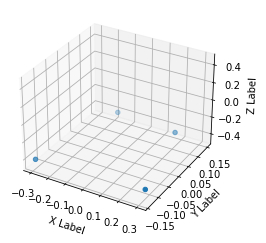

Time diff:  267.0
Footstep timestamp:  2765718.0
Height check index:  6291
Height check timestamp:  2765818.0

FL moving: 0.09778199999999998. FR moving: 0.002137
RL moving: 0.004879000000000022. RR moving: 0.09638400000000003

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.39822. FR later: -0.400357
RR moving: -0.395493. RL moving: -0.297711

Coord FR: [0.304, -0.124, -0.398]. Coord FL: [0.184, 0.129, -0.395]. Coord RR: [-0.299, -0.138, -0.409]. Coord RL: [-0.178, 0.148, -0.406]

FR step_size: 0.23753300000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.23798.


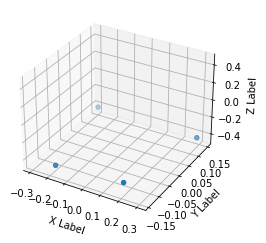

Time diff:  269.0
Footstep timestamp:  2765985.0
Height check index:  6424
Height check timestamp:  2766085.0

FL moving: 0.003971000000000002. FR moving: 0.095059
RL moving: 0.09383800000000003. RR moving: 0.004161000000000026

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.39772. FR later: -0.302661
RR moving: -0.39382. RL moving: -0.397791

Coord FR: [0.187, -0.128, -0.398]. Coord FL: [0.304, 0.131, -0.394]. Coord RR: [-0.177, -0.142, -0.404]. Coord RL: [-0.294, 0.146, -0.411]

FR step_size: 0.23285899999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.236951.


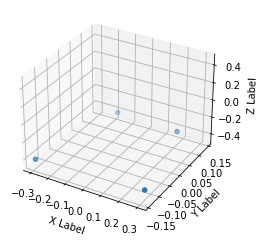

Time diff:  265.0
Footstep timestamp:  2766254.0
Height check index:  6558
Height check timestamp:  2766354.0

FL moving: 0.09790000000000004. FR moving: 0.0025540000000000007
RL moving: 0.003583000000000003. RR moving: 0.09570699999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.397041. FR later: -0.399595
RR moving: -0.396774. RL moving: -0.298874

Coord FR: [0.302, -0.13, -0.397]. Coord FL: [0.186, 0.129, -0.397]. Coord RR: [-0.299, -0.141, -0.408]. Coord RL: [-0.179, 0.141, -0.408]

FR step_size: 0.23682099999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.24092999999999998.


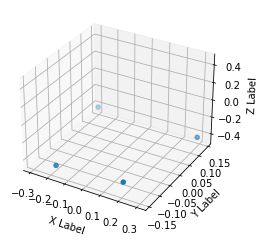

Time diff:  271.0
Footstep timestamp:  2766519.0
Height check index:  6690
Height check timestamp:  2766619.0

FL moving: 0.0026579999999999937. FR moving: 0.094943
RL moving: 0.09287299999999998. RR moving: 0.004975000000000007

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.396742. FR later: -0.301799
RR moving: -0.393183. RL moving: -0.395841

Coord FR: [0.184, -0.13, -0.397]. Coord FL: [0.305, 0.13, -0.393]. Coord RR: [-0.176, -0.145, -0.403]. Coord RL: [-0.296, 0.143, -0.411]

FR step_size: 0.23806799999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.24037999999999998.


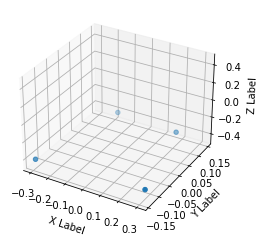

Time diff:  267.0
Footstep timestamp:  2766790.0
Height check index:  6825
Height check timestamp:  2766890.0

FL moving: 0.09808. FR moving: 0.0031400000000000317
RL moving: 0.0037940000000000196. RR moving: 0.09604000000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.397041. FR later: -0.400181
RR moving: -0.396102. RL moving: -0.298022

Coord FR: [0.304, -0.128, -0.397]. Coord FL: [0.187, 0.128, -0.396]. Coord RR: [-0.298, -0.141, -0.408]. Coord RL: [-0.177, 0.144, -0.407]

FR step_size: 0.23482199999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.23826299999999997.


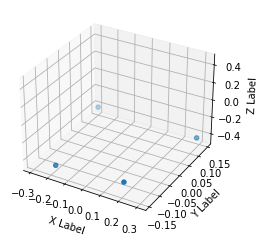

Time diff:  267.0
Footstep timestamp:  2767057.0
Height check index:  6958
Height check timestamp:  2767157.0

FL moving: 0.0023009999999999975. FR moving: 0.09637600000000002
RL moving: 0.09524499999999997. RR moving: 0.004917999999999978

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.39725. FR later: -0.300874
RR moving: -0.3941. RL moving: -0.396401

Coord FR: [0.186, -0.129, -0.397]. Coord FL: [0.304, 0.13, -0.394]. Coord RR: [-0.178, -0.145, -0.403]. Coord RL: [-0.296, 0.146, -0.411]

FR step_size: 0.233795. FL step_size: 0. RR step size: 0. RL step_size: 0.237139.


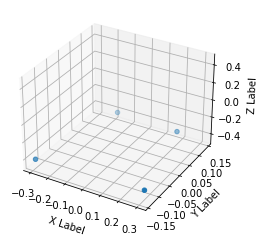

Time diff:  64177.0


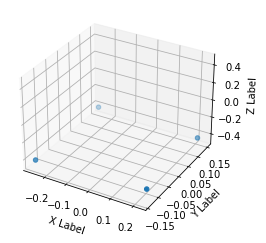

Time diff:  261.0
Footstep timestamp:  2831501.0
Height check index:  7209
Height check timestamp:  2831601.0

FL moving: 0.09749199999999997. FR moving: 0.0014939999999999953
RL moving: 0.0023079999999999767. RR moving: 0.09828700000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.41679. FR later: -0.415296
RR moving: -0.404885. RL moving: -0.307393

Coord FR: [0.217, -0.115, -0.417]. Coord FL: [0.219, 0.137, -0.405]. Coord RR: [-0.264, -0.138, -0.417]. Coord RL: [-0.262, 0.148, -0.41]

FR step_size: 0.11601799999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.128439.


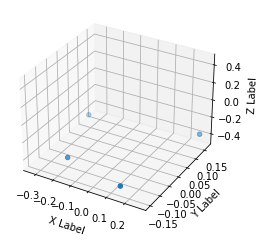

Time diff:  540.0


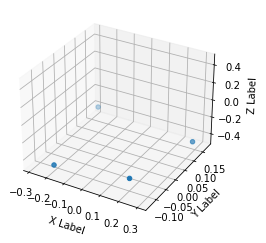

Time diff:  267.0
Footstep timestamp:  2832302.0
Height check index:  7608
Height check timestamp:  2832402.0

FL moving: 0.00505899999999998. FR moving: 0.09483400000000003
RL moving: 0.09009700000000004. RR moving: 0.004763000000000017

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397789. FR later: -0.302955
RR moving: -0.391123. RL moving: -0.396182

Coord FR: [0.192, -0.092, -0.398]. Coord FL: [0.301, 0.134, -0.391]. Coord RR: [-0.182, -0.13, -0.406]. Coord RL: [-0.288, 0.174, -0.41]

FR step_size: 0.21747299999999997. FL step_size: 0. RR step size: 0. RL step_size: 0.230539.


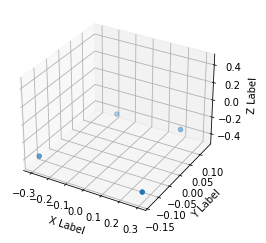

Time diff:  267.0
Footstep timestamp:  2832569.0
Height check index:  7741
Height check timestamp:  2832669.0

FL moving: 0.095615. FR moving: 0.0021979999999999777
RL moving: 0.004974000000000034. RR moving: 0.09681600000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.393208. FR later: -0.395406
RR moving: -0.395327. RL moving: -0.299712

Coord FR: [0.3, -0.137, -0.393]. Coord FL: [0.191, 0.135, -0.395]. Coord RR: [-0.302, -0.122, -0.408]. Coord RL: [-0.178, 0.128, -0.408]

FR step_size: 0.233705. FL step_size: 0. RR step size: 0. RL step_size: 0.23954599999999998.


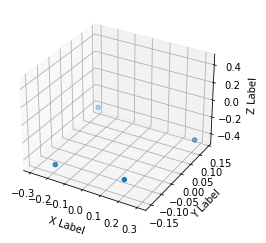

Time diff:  267.0
Footstep timestamp:  2832836.0
Height check index:  7874
Height check timestamp:  2832936.0

FL moving: 0.0027650000000000174. FR moving: 0.09426099999999998
RL moving: 0.09306500000000001. RR moving: 0.006266999999999967

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.392167. FR later: -0.297906
RR moving: -0.394687. RL moving: -0.397452

Coord FR: [0.178, -0.13, -0.392]. Coord FL: [0.303, 0.112, -0.395]. Coord RR: [-0.181, -0.154, -0.397]. Coord RL: [-0.296, 0.139, -0.414]

FR step_size: 0.24497. FL step_size: 0. RR step size: 0. RL step_size: 0.246114.


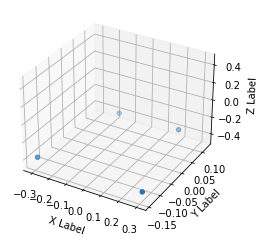

Time diff:  269.0
Footstep timestamp:  2833103.0
Height check index:  8007
Height check timestamp:  2833203.0

FL moving: 0.094937. FR moving: 0.00531100000000001
RL moving: 0.0037369999999999903. RR moving: 0.09454999999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.390832. FR later: -0.396143
RR moving: -0.398196. RL moving: -0.303259

Coord FR: [0.306, -0.144, -0.391]. Coord FL: [0.186, 0.121, -0.398]. Coord RR: [-0.307, -0.136, -0.404]. Coord RL: [-0.175, 0.123, -0.41]

FR step_size: 0.241969. FL step_size: 0. RR step size: 0. RL step_size: 0.24894700000000003.


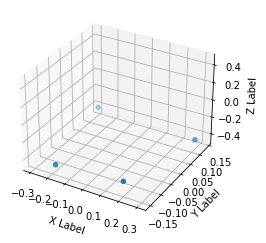

Time diff:  267.0
Footstep timestamp:  2833372.0
Height check index:  8140
Height check timestamp:  2833471.0

FL moving: 0.0014350000000000196. FR moving: 0.09229899999999996
RL moving: 0.09153699999999998. RR moving: 0.006838999999999984

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393383. FR later: -0.301084
RR moving: -0.397497. RL moving: -0.398932

Coord FR: [0.181, -0.134, -0.393]. Coord FL: [0.303, 0.113, -0.397]. Coord RR: [-0.179, -0.151, -0.397]. Coord RL: [-0.296, 0.138, -0.414]

FR step_size: 0.24017200000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.24575099999999997.


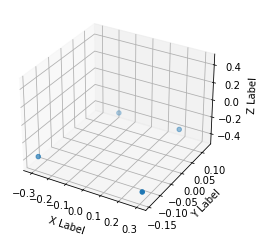

Time diff:  267.0
Footstep timestamp:  2833639.0
Height check index:  8273
Height check timestamp:  2833738.0

FL moving: 0.09493399999999996. FR moving: 0.004109000000000029
RL moving: 0.003966999999999998. RR moving: 0.09407399999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.391916. FR later: -0.396025
RR moving: -0.398095. RL moving: -0.303161

Coord FR: [0.305, -0.144, -0.392]. Coord FL: [0.187, 0.124, -0.398]. Coord RR: [-0.304, -0.133, -0.404]. Coord RL: [-0.175, 0.124, -0.409]

FR step_size: 0.242523. FL step_size: 0. RR step size: 0. RL step_size: 0.247789.


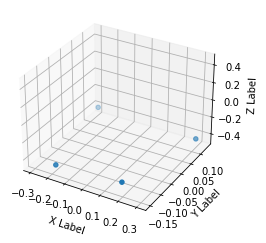

Time diff:  269.0
Footstep timestamp:  2833906.0
Height check index:  8406
Height check timestamp:  2834005.0

FL moving: 0.002670999999999979. FR moving: 0.090968
RL moving: 0.09043099999999998. RR moving: 0.0066030000000000255

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393098. FR later: -0.30213
RR moving: -0.396465. RL moving: -0.399136

Coord FR: [0.181, -0.138, -0.393]. Coord FL: [0.306, 0.114, -0.396]. Coord RR: [-0.177, -0.15, -0.398]. Coord RL: [-0.296, 0.134, -0.414]

FR step_size: 0.24334499999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.245217.


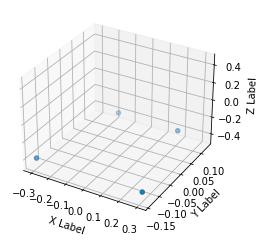

Time diff:  267.0
Footstep timestamp:  2834175.0
Height check index:  8540
Height check timestamp:  2834274.0

FL moving: 0.09492699999999998. FR moving: 0.003674999999999984
RL moving: 0.0034889999999999644. RR moving: 0.094611

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.393376. FR later: -0.397051
RR moving: -0.398185. RL moving: -0.303258

Coord FR: [0.304, -0.14, -0.393]. Coord FL: [0.186, 0.122, -0.398]. Coord RR: [-0.303, -0.136, -0.404]. Coord RL: [-0.177, 0.129, -0.41]

FR step_size: 0.240096. FL step_size: 0. RR step size: 0. RL step_size: 0.24611399999999997.


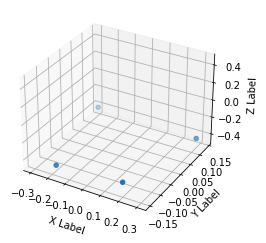

Time diff:  270.0
Footstep timestamp:  2834442.0
Height check index:  8673
Height check timestamp:  2834541.0

FL moving: 0.0018289999999999695. FR moving: 0.09279000000000004
RL moving: 0.09157799999999999. RR moving: 0.005312000000000039

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.393759. FR later: -0.300969
RR moving: -0.39622. RL moving: -0.398049

Coord FR: [0.182, -0.136, -0.394]. Coord FL: [0.304, 0.12, -0.396]. Coord RR: [-0.177, -0.149, -0.4]. Coord RL: [-0.298, 0.138, -0.413]

FR step_size: 0.241176. FL step_size: 0. RR step size: 0. RL step_size: 0.24447499999999997.


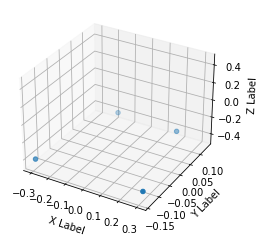

Time diff:  265.0
Footstep timestamp:  2834712.0
Height check index:  8808
Height check timestamp:  2834812.0

FL moving: 0.09804299999999999. FR moving: 0.0042560000000000375
RL moving: 0.003404000000000018. RR moving: 0.096663

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.394356. FR later: -0.398612
RR moving: -0.397138. RL moving: -0.299095

Coord FR: [0.305, -0.136, -0.394]. Coord FL: [0.185, 0.123, -0.397]. Coord RR: [-0.301, -0.139, -0.406]. Coord RL: [-0.178, 0.134, -0.409]

FR step_size: 0.240788. FL step_size: 0. RR step size: 0. RL step_size: 0.24516200000000002.


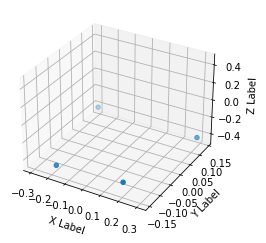

Time diff:  271.0
Footstep timestamp:  2834977.0
Height check index:  8940
Height check timestamp:  2835077.0

FL moving: 0.0031059999999999977. FR moving: 0.09310600000000002
RL moving: 0.09175699999999998. RR moving: 0.005051000000000028

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.395619. FR later: -0.302513
RR moving: -0.393816. RL moving: -0.396922

Coord FR: [0.184, -0.133, -0.396]. Coord FL: [0.305, 0.125, -0.394]. Coord RR: [-0.176, -0.147, -0.401]. Coord RL: [-0.298, 0.139, -0.412]

FR step_size: 0.238885. FL step_size: 0. RR step size: 0. RL step_size: 0.242167.


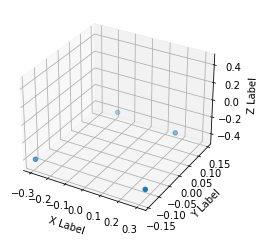

Time diff:  265.0
Footstep timestamp:  2835248.0
Height check index:  9075
Height check timestamp:  2835348.0

FL moving: 0.09706700000000001. FR moving: 0.003493000000000024
RL moving: 0.004195000000000004. RR moving: 0.09507400000000005

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.397333. FR later: -0.400826
RR moving: -0.39626. RL moving: -0.299193

Coord FR: [0.304, -0.127, -0.397]. Coord FL: [0.186, 0.125, -0.396]. Coord RR: [-0.299, -0.141, -0.408]. Coord RL: [-0.179, 0.145, -0.406]

FR step_size: 0.23588199999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.24180000000000001.


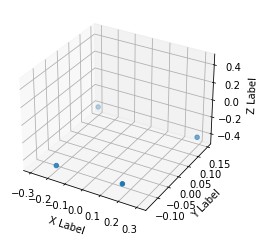

Time diff:  271.0
Footstep timestamp:  2835513.0
Height check index:  9207
Height check timestamp:  2835613.0

FL moving: 0.0038830000000000253. FR moving: 0.093144
RL moving: 0.09210099999999999. RR moving: 0.004921000000000009

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.398043. FR later: -0.304899
RR moving: -0.391621. RL moving: -0.395504

Coord FR: [0.187, -0.127, -0.398]. Coord FL: [0.305, 0.133, -0.392]. Coord RR: [-0.176, -0.135, -0.404]. Coord RL: [-0.298, 0.146, -0.409]

FR step_size: 0.23616399999999999. FL step_size: 0. RR step size: 0. RL step_size: 0.242337.


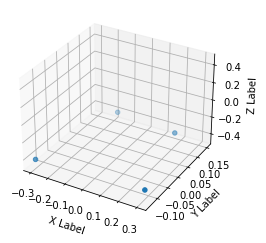

Time diff:  2164.0


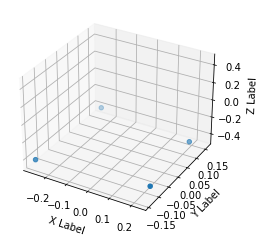

Time diff:  259.0
Footstep timestamp:  2837948.0
Height check index:  9515
Height check timestamp:  2838047.0

FL moving: 0.09871799999999997. FR moving: 0.0015779999999999683
RL moving: 0.00285300000000005. RR moving: 0.098082

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.41684. FR later: -0.415262
RR moving: -0.408502. RL moving: -0.309784

Coord FR: [0.228, -0.103, -0.417]. Coord FL: [0.211, 0.122, -0.409]. Coord RR: [-0.271, -0.142, -0.413]. Coord RL: [-0.255, 0.159, -0.408]

FR step_size: 0.132652. FL step_size: 0. RR step size: 0. RL step_size: 0.14207200000000003.


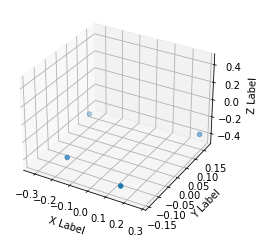

Time diff:  272.0
Footstep timestamp:  2838207.0
Height check index:  9644
Height check timestamp:  2838306.0

FL moving: 0.00388299999999997. FR moving: 0.082015
RL moving: 0.081258. RR moving: 0.003597000000000017

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.404604. FR later: -0.322589
RR moving: -0.389581. RL moving: -0.393464

Coord FR: [0.158, -0.143, -0.405]. Coord FL: [0.274, 0.167, -0.39]. Coord RR: [-0.197, -0.096, -0.409]. Coord RL: [-0.323, 0.121, -0.409]

FR step_size: 0.26635600000000004. FL step_size: 0. RR step size: 0. RL step_size: 0.266258.


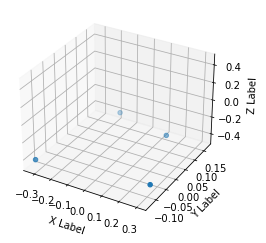

Time diff:  269.0
Footstep timestamp:  2838479.0
Height check index:  9780
Height check timestamp:  2838579.0

FL moving: 0.092856. FR moving: 0.0040579999999999505
RL moving: 0.00628799999999996. RR moving: 0.09226200000000001

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.399112. FR later: -0.40317
RR moving: -0.394516. RL moving: -0.30166

Coord FR: [0.305, -0.09, -0.399]. Coord FL: [0.154, 0.124, -0.395]. Coord RR: [-0.321, -0.128, -0.413]. Coord RL: [-0.181, 0.167, -0.402]

FR step_size: 0.26540699999999995. FL step_size: 0. RR step size: 0. RL step_size: 0.254369.


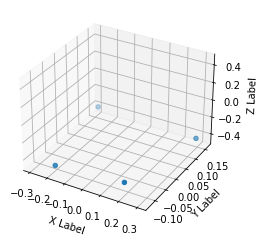

Time diff:  267.0
Footstep timestamp:  2838748.0
Height check index:  9914
Height check timestamp:  2838848.0

FL moving: 0.003697999999999979. FR moving: 0.09728399999999998
RL moving: 0.09369. RR moving: 0.0035640000000000116

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.400227. FR later: -0.302943
RR moving: -0.392081. RL moving: -0.395779

Coord FR: [0.187, -0.107, -0.4]. Coord FL: [0.302, 0.14, -0.392]. Coord RR: [-0.179, -0.123, -0.407]. Coord RL: [-0.293, 0.159, -0.408]

FR step_size: 0.23104799999999998. FL step_size: 0. RR step size: 0. RL step_size: 0.23494600000000002.


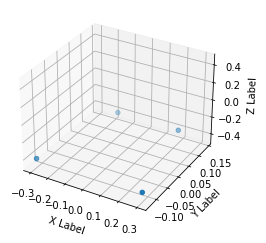

Time diff:  13741.0


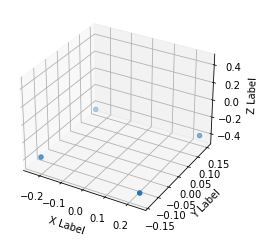

Time diff:  267.0
Footstep timestamp:  2852756.0
Height check index:  10114
Height check timestamp:  2852856.0

FL moving: 0.0033929999999999794. FR moving: 0.098489
RL moving: 0.09851300000000002. RR moving: 4.199999999998649e-05

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.413052. FR later: -0.314563
RR moving: -0.401727. RL moving: -0.40512

Coord FR: [0.234, -0.138, -0.413]. Coord FL: [0.245, 0.149, -0.402]. Coord RR: [-0.236, -0.12, -0.419]. Coord RL: [-0.242, 0.137, -0.414]

FR step_size: 0.041117000000000015. FL step_size: 0. RR step size: 0. RL step_size: 0.053591.


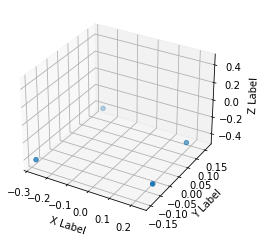

Time diff:  259.0
Footstep timestamp:  2853023.0
Height check index:  10247
Height check timestamp:  2853123.0

FL moving: 0.10156799999999999. FR moving: 0.0010120000000000129
RL moving: 0.0012960000000000194. RR moving: 0.09679900000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.41258. FR later: -0.411568
RR moving: -0.407091. RL moving: -0.305523

Coord FR: [0.232, -0.099, -0.413]. Coord FL: [0.206, 0.116, -0.407]. Coord RR: [-0.277, -0.15, -0.413]. Coord RL: [-0.254, 0.164, -0.411]

FR step_size: 0.145048. FL step_size: 0. RR step size: 0. RL step_size: 0.150954.


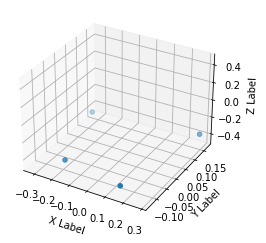

Time diff:  273.0
Footstep timestamp:  2853282.0
Height check index:  10376
Height check timestamp:  2853382.0

FL moving: 0.005117000000000038. FR moving: 0.084901
RL moving: 0.08335100000000001. RR moving: 0.004410000000000025

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.402466. FR later: -0.317565
RR moving: -0.385381. RL moving: -0.390498

Coord FR: [0.159, -0.131, -0.402]. Coord FL: [0.278, 0.167, -0.385]. Coord RR: [-0.193, -0.097, -0.41]. Coord RL: [-0.321, 0.137, -0.41]

FR step_size: 0.263594. FL step_size: 0. RR step size: 0. RL step_size: 0.266042.


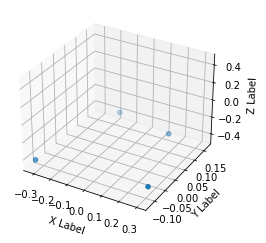

Time diff:  265.0
Footstep timestamp:  2853555.0
Height check index:  10512
Height check timestamp:  2853655.0

FL moving: 0.094171. FR moving: 0.002210999999999963
RL moving: 0.007427000000000017. RR moving: 0.09453699999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.398351. FR later: -0.400562
RR moving: -0.390643. RL moving: -0.296472

Coord FR: [0.305, -0.094, -0.398]. Coord FL: [0.16, 0.132, -0.391]. Coord RR: [-0.318, -0.121, -0.415]. Coord RL: [-0.18, 0.166, -0.401]

FR step_size: 0.261335. FL step_size: 0. RR step size: 0. RL step_size: 0.255482.


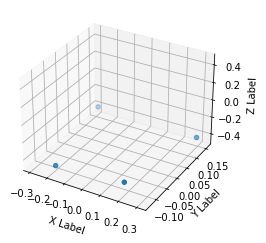

Time diff:  269.0
Footstep timestamp:  2853820.0
Height check index:  10644
Height check timestamp:  2853920.0

FL moving: 0.004535000000000011. FR moving: 0.09403699999999998
RL moving: 0.091752. RR moving: 0.0048759999999999915

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.397883. FR later: -0.303846
RR moving: -0.388115. RL moving: -0.39265

Coord FR: [0.188, -0.112, -0.398]. Coord FL: [0.304, 0.139, -0.388]. Coord RR: [-0.176, -0.128, -0.407]. Coord RL: [-0.293, 0.155, -0.408]

FR step_size: 0.233863. FL step_size: 0. RR step size: 0. RL step_size: 0.241309.


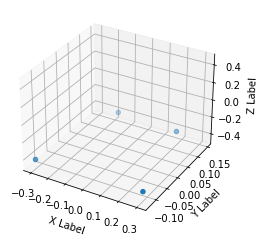

Time diff:  267.0
Footstep timestamp:  2854089.0
Height check index:  10778
Height check timestamp:  2854189.0

FL moving: 0.09587599999999996. FR moving: 0.0021210000000000395
RL moving: 0.005487999999999993. RR moving: 0.09643400000000002

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.395717. FR later: -0.397838
RR moving: -0.393105. RL moving: -0.297229

Coord FR: [0.304, -0.123, -0.396]. Coord FL: [0.186, 0.133, -0.393]. Coord RR: [-0.3, -0.126, -0.411]. Coord RL: [-0.176, 0.146, -0.406]

FR step_size: 0.240763. FL step_size: 0. RR step size: 0. RL step_size: 0.24198299999999998.


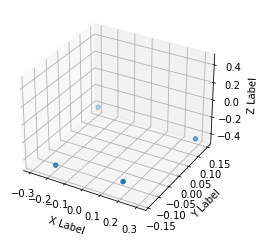

Time diff:  267.0
Footstep timestamp:  2854356.0
Height check index:  10911
Height check timestamp:  2854456.0

FL moving: 0.004361000000000004. FR moving: 0.09511199999999997
RL moving: 0.092951. RR moving: 0.004315000000000013

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.394779. FR later: -0.299667
RR moving: -0.39237. RL moving: -0.396731

Coord FR: [0.183, -0.124, -0.395]. Coord FL: [0.306, 0.125, -0.392]. Coord RR: [-0.178, -0.14, -0.402]. Coord RL: [-0.296, 0.147, -0.412]

FR step_size: 0.24319100000000002. FL step_size: 0. RR step size: 0. RL step_size: 0.24954199999999999.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/dailand10/miniconda3/envs/thesis/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/gm/x0tmptjs18q3s14ggtgz_jp00000gn/T/ipykernel_2904/3714090615.py", line 76, in <module>
    visualize_absolute_foostep_sizes(motion_03_fwd, footsteps_03_fwd)
  File "/var/folders/gm/x0tmptjs18q3s14ggtgz_jp00000gn/T/ipykernel_2904/3714090615.py", line 24, in visualize_absolute_foostep_sizes
    plt.show()
  File "/Users/dailand10/miniconda3/envs/thesis/lib/python3.9/site-packages/matplotlib/pyplot.py", line 353, in show
    return _backend_mod.show(*args, **kwargs)
  File "/Users/dailand10/miniconda3/envs/thesis/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 41, in show
    display(
  File "/Users/dailand10/miniconda3/envs/thesis/lib/python3.9/site-packages/IPython/core/display.py", line 320, in display
    format_dict, md_

TypeError: object of type 'NoneType' has no len()

In [41]:
def visualize_absolute_foostep_sizes(dataset, footsteps):    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
                    
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
        
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
        
            print("Time diff: ", time_diff)

            if time_diff < 300:
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(motion_03_cmds[:, 0] - (motion_03_cmds[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(motion_03_cmds[footstep, 34] - motion_03_cmds[idx_height_check, 34])
                fl_moving = np.abs(motion_03_cmds[footstep, 37] - motion_03_cmds[idx_height_check, 37])
                rr_moving = np.abs(motion_03_cmds[footstep, 40] - motion_03_cmds[idx_height_check, 40])
                rl_moving = np.abs(motion_03_cmds[footstep, 43] - motion_03_cmds[idx_height_check, 43])
                
                print("Footstep timestamp: ", motion_03_cmds[footstep, 0])
                print("Height check index: ", idx_height_check)
                print("Height check timestamp: ", motion_03_cmds[idx_height_check, 0])

                print(f'\nFL moving: {fl_moving}. FR moving: {fr_moving}')
                print(f'RL moving: {rl_moving}. RR moving: {rr_moving}')

                print(f'\nFL moving: {fl_moving > 0.06}. FR moving: {fr_moving > 0.06}')
                print(f'RL moving: {rl_moving > 0.06}. RR moving: {rr_moving > 0.06}')
                
                print(f'\nFR before: {motion_03_cmds[footstep, 34]}. FR later: {motion_03_cmds[idx_height_check, 34]}')
                print(f'RR moving: {motion_03_cmds[footstep, 37]}. RL moving: {motion_03_cmds[idx_height_check, 37]}')

                assert (fr_moving > 0.06) == (rl_moving > 0.06)
                assert (rr_moving > 0.06) == (fl_moving > 0.06)
                assert (fr_moving > 0.06) != (fl_moving > 0.06)
                
                # Compute front feet movements
                fr_movement = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fl_movement = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                rr_movement = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rl_movement = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                
                print(f'\nCoord FR: {[xs[0], ys[0], zs[0]]}. Coord FL: {[xs[1], ys[1], zs[1]]}. Coord RR: {[xs[2], ys[2], zs[2]]}. Coord RL: {[xs[3], ys[3], zs[3]]}')
                
                if fr_moving:
                    print(f'\nFR step_size: {fr_movement + fl_movement}. FL step_size: {0}. RR step size: {0}. RL step_size: {rl_movement + rr_movement}.')
                elif fl_moving:
                    print(f'\nFR step_size: {0}. FL step_size: {fl_movement + fr_movement}. RR step size: {rl_movement + rr_movement}. RL step_size: {0}.')
                else:
                    print("\nERROR")

cmds = get_specific_cmd(motion_03, velocity, 0, 0)
motion_03_cmds = motion_03[cmds]
visualize_absolute_foostep_sizes(motion_03_fwd, footsteps_03_fwd)

### Forward motion

In [ ]:
step_size_fr_x_fwd

In [ ]:
visualize_static_foosteps(motion_03_fwd, footsteps_03_fwd)

In [ ]:
anim = visualize_animated_footsteps(motion_03_fwd, footsteps_03_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

In [ ]:
anim = visualize_animated_footsteps(motion_03_bwd, footsteps_03_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

In [ ]:
anim = visualize_animated_footsteps(motion_03_side_right, footsteps_03_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion_03_side_left, footsteps_03_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_03_clock, footsteps_03_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_03_count, footsteps_03_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [42]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

In [48]:
def create_timestamp_consistent_dataset(dataset, footsteps):
    # Footsteps sizes
    inputs = []
    labels = []
        
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                labels.append(dataset[footsteps[idx], 32:44])
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_03_fwd_3D, Y_motion_03_fwd_3D = create_timestamp_consistent_dataset(motion_03_fwd, footsteps_03_fwd)
X_motion_03_bwd_3D, Y_motion_03_bwd_3D = create_timestamp_consistent_dataset(motion_03_bwd, footsteps_03_bwd)
X_motion_03_clock_3D, Y_motion_03_clock_3D = create_timestamp_consistent_dataset(motion_03_clock, footsteps_03_clock)
X_motion_03_count_3D, Y_motion_03_count_3D = create_timestamp_consistent_dataset(motion_03_count, footsteps_03_count)
X_motion_03_side_left_3D, Y_motion_03_side_left_3D = create_timestamp_consistent_dataset(motion_03_side_left, footsteps_03_side_left)
X_motion_03_side_right_3D, Y_motion_03_side_right_3D = create_timestamp_consistent_dataset(motion_03_side_right, footsteps_03_side_right)

# Stack datasets
X_motion_03_3D = np.concatenate((X_motion_03_fwd_3D, X_motion_03_bwd_3D, X_motion_03_side_right_3D, X_motion_03_side_left_3D, X_motion_03_clock_3D, X_motion_03_count_3D))
Y_motion_03_3D = np.concatenate((Y_motion_03_fwd_3D, Y_motion_03_bwd_3D, Y_motion_03_side_right_3D, Y_motion_03_side_left_3D, Y_motion_03_clock_3D, Y_motion_03_count_3D))

In [49]:
%store X_motion_03_3D
%store Y_motion_03_3D

Stored 'X_motion_03_3D' (ndarray)
Stored 'Y_motion_03_3D' (ndarray)


In [45]:
def create_timestamp_consistent_dataset_with_step_size_labels(dataset, footsteps, threshold=0.04):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 300:
                # Input (command, state, x/y/z position for each foot)
                #inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34]) > threshold
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37]) > threshold
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40]) > threshold
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43]) > threshold

                assert fr_moving == rl_moving
                assert rr_moving == fl_moving
                assert fr_moving != fl_moving
                
                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fr_movement_y = abs(abs(dataset[footstep, 33]) - abs(dataset[footsteps[idx+1], 33]))
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                fl_movement_y = abs(abs(dataset[footstep, 36]) - abs(dataset[footsteps[idx+1], 36]))
                
                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rr_movement_y = abs(abs(dataset[footstep, 39]) - abs(dataset[footsteps[idx+1], 39]))
                
                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                rl_movement_y = abs(abs(dataset[footstep, 42]) - abs(dataset[footsteps[idx+1], 42]))
                
                label = []
                                
                if fr_moving:
                    label.append([fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, 0, 0, 0, 0, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y])
                elif fl_moving:
                    label.append([0, 0, fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y, 0, 0])
                else:
                    print("\nERROR")
                    
                labels.append(label)
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + [int(fr_moving), int(fl_moving), int(rr_moving), int(rl_moving)])
                
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy.reshape(labels_numpy.shape[0], labels_numpy.shape[2])

X_motion_03_fwd_step, Y_motion_03_fwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_03_fwd, footsteps_03_fwd)
X_motion_03_bwd_step, Y_motion_03_bwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_03_bwd, footsteps_03_bwd)
X_motion_03_clock_step, Y_motion_03_clock_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_03_clock, footsteps_03_clock)
X_motion_03_count_step, Y_motion_03_count_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_03_count, footsteps_03_count)
X_motion_03_side_left_step, Y_motion_03_side_left_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_03_side_left, footsteps_03_side_left)
X_motion_03_side_right_step, Y_motion_03_side_right_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_03_side_right, footsteps_03_side_right)

# Stack datasets
X_motion_03_step = np.concatenate((X_motion_03_fwd_step, X_motion_03_bwd_step, X_motion_03_side_right_step, X_motion_03_side_left_step, X_motion_03_clock_step, X_motion_03_count_step))
Y_motion_03_step = np.concatenate((Y_motion_03_fwd_step, Y_motion_03_bwd_step, Y_motion_03_side_right_step, Y_motion_03_side_left_step, Y_motion_03_clock_step, Y_motion_03_count_step))

In [46]:
%store X_motion_03_step
%store Y_motion_03_step

Stored 'X_motion_03_step' (ndarray)
Stored 'Y_motion_03_step' (ndarray)


In [47]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} motion\n')
    
    # Find all positive movements in x and y for FR
    fr_steps_x = np.where(dataset[:, 0] > 0)[0]
    fr_steps_y = np.where(dataset[:, 1] > 0)[0]
    
    # Find all positive movements in x and y for FR
    fl_steps_x = np.where(dataset[:, 2] > 0)[0]
    fl_steps_y = np.where(dataset[:, 3] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rr_steps_x = np.where(dataset[:, 4] > 0)[0]
    rr_steps_y = np.where(dataset[:, 5] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rl_steps_x = np.where(dataset[:, 6] > 0)[0]
    rl_steps_y = np.where(dataset[:, 7] > 0)[0]
    
    # Compute stats for FR foot
    print(f'FR mean x step: {np.mean(dataset[fr_steps_x, 0])}. FR std x step: {np.std(dataset[fr_steps_x, 0])}. FR mean y step: {np.mean(dataset[fr_steps_y, 1])}. FR std y step: {np.mean(dataset[fr_steps_y, 1])}')
 
    # Compute stats for FL foot
    print(f'FL mean x step: {np.mean(dataset[fl_steps_x, 2])}. FL std x step: {np.std(dataset[fl_steps_x, 2])}. FL mean y step: {np.mean(dataset[fl_steps_y, 3])}. FL std y step: {np.mean(dataset[fl_steps_y, 3])}')
    
    # Compute stats for RR foot
    print(f'RR mean x step: {np.mean(dataset[rr_steps_x, 4])}. RR std x step: {np.std(dataset[rr_steps_x, 4])}. RR mean y step: {np.mean(dataset[rr_steps_y, 5])}. RR std y step: {np.mean(dataset[rr_steps_y, 5])}')
    
    # Compute stats for RL foot
    print(f'RL mean x step: {np.mean(dataset[rl_steps_x, 6])}. RL std x step: {np.std(dataset[rl_steps_x, 6])}. RL mean y step: {np.mean(dataset[rl_steps_y, 7])}. RL std y step: {np.mean(dataset[rl_steps_y, 7])}\n')
    
labels_stats(Y_motion_03_fwd_step, "forward")
labels_stats(Y_motion_03_bwd_step, "backward")
labels_stats(Y_motion_03_clock_step, "clockwise")
labels_stats(Y_motion_03_count_step, "counter clockwise")
labels_stats(Y_motion_03_side_left_step, "left step")
labels_stats(Y_motion_03_side_right_step, "right step")

Statistics for forward motion

FR mean x step: 0.23406129268292677. FR std x step: 0.030575234727171826. FR mean y step: 0.015302932098765432. FR std y step: 0.015302932098765432
FL mean x step: 0.23176603703703705. FL std x step: 0.02993424018400483. FL mean y step: 0.014198522784810128. FL std y step: 0.014198522784810128
RR mean x step: 0.23525707407407404. RR std x step: 0.02827151786541122. RR mean y step: 0.017505182716049377. RR std y step: 0.017505182716049377
RL mean x step: 0.2376131829268293. RL std x step: 0.029337037913526792. RL mean y step: 0.017289826829268287. RL std y step: 0.017289826829268287

Statistics for backward motion

FR mean x step: 0.07836026666666665. FR std x step: 0.009293709177478899. FR mean y step: 0.04980084. FR std y step: 0.04980084
FL mean x step: 0.0769560675675676. FL std x step: 0.012976405128655707. FL mean y step: 0.0484972027027027. FL std y step: 0.0484972027027027
RR mean x step: 0.08243098648648647. RR std x step: 0.013449938158697617. RR